In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from sklearn.metrics import (roc_curve, auc, accuracy_score)

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from statistics import mean
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import itertools

In [2]:

path_0 = Path(r'C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv')

author = ['Poe','Twain','AB']
type_ = ['story']

choice = [0,1,2]

#index_i = 0
#index_j = 1

#path = str(path_0) + str('/') + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])
#print(path)

path_list = []
for index_i in range(len(author)):
    for index_j in range(len(type_)):
        path = str(path_0) + str('/') + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])
        path_list.append(path)
        print(index_i,index_j, path_list)

0 0 ['C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/Poe-story']
1 0 ['C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/Poe-story', 'C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/Twain-story']
2 0 ['C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/Poe-story', 'C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/Twain-story', 'C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/AB-story']


In [3]:
for i in range(len(author)*len(type_)):
    print(i, path_list[i])

0 C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv/Poe-story
1 C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv/Twain-story
2 C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv/AB-story


In [4]:
new_dir_path_csv = 'csv/' + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])
new_dir_path_png = 'png/' + str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])

author_type = str(author[choice[index_i]]) + str('-') + str(type_[choice[index_j]])

new_dir_path_png_top = 'png/' + author_type + '/top_ranking'
new_dir_path_png_top_no_punc = 'png/' + author_type + '/top_ranking_no_punc'
new_dir_path_png_top_no_punc_no_stopwords = 'png/' + author_type + '/top_ranking_no_punc_no_stopwords'
new_dir_path_png_dispersion_plot = 'png/' + author_type + '/dispersion_plot'
new_dir_path_png_biagram_plot  = 'png/' + author_type + '/biagram_plot'

new_dir_path_png_Combi_n_2 = 'png/' + 'poe_story_vs_others_stories_test02' + '/combi_n_2_plot'
new_dir_path_png_Mahalanobis = 'png/' + 'poe_story_vs_others_stories_test02' + '/Mahalanobis_plot'
new_dir_path_png_decom_dim2 = 'png/' + 'poe_story_vs_others_stories_test02' + '/decom_dim2_plot'
new_dir_path_png_decom_dim2_EM = 'png/' + 'poe_story_vs_others_stories_test02' + '/decom_dim2_EM_plot'

def my_makedirs(path):
    if not os.path.isdir(path):
        os.makedirs(path)

my_makedirs(new_dir_path_csv)
my_makedirs(new_dir_path_png)
my_makedirs(new_dir_path_png_top)
my_makedirs(new_dir_path_png_top_no_punc)
my_makedirs(new_dir_path_png_top_no_punc_no_stopwords)

my_makedirs(new_dir_path_png_dispersion_plot)
my_makedirs(new_dir_path_png_biagram_plot)

my_makedirs(new_dir_path_png_Combi_n_2)
my_makedirs(new_dir_path_png_Mahalanobis)

my_makedirs(new_dir_path_png_decom_dim2)
my_makedirs(new_dir_path_png_decom_dim2_EM)

In [5]:
new_dir_path_csv, new_dir_path_png, new_dir_path_png_top, new_dir_path_png_top_no_punc, new_dir_path_png_top_no_punc_no_stopwords,new_dir_path_png_dispersion_plot, new_dir_path_png_biagram_plot

('csv/AB-story',
 'png/AB-story',
 'png/AB-story/top_ranking',
 'png/AB-story/top_ranking_no_punc',
 'png/AB-story/top_ranking_no_punc_no_stopwords',
 'png/AB-story/dispersion_plot',
 'png/AB-story/biagram_plot')

In [6]:
#path = Path(r'C:\Users\tsuka\Desktop\csv')
#path = Path(r'C:\Users\SI\Python_ML\NLTK_\csv\Poe-story')
path = Path(path)
path
path.glob('*.csv')
list(path.glob('*.csv'))
print('lists:', path.glob('*.csv'))
#list path
path = list(path.glob('*.csv'))
path

lists: <generator object Path.glob at 0x000002398F40D7C8>


[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/AB-story/AB_story_to_csv_output_nor.csv'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/AB-story/AB_story_to_csv_output_original.csv'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/AB-story/AB_story_to_csv_output_percentage.csv'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/AB-story/AB_story_to_csv_output_std.csv')]

In [7]:
path_csv_list = []
for i in range(len(author)*len(type_)):
    path = Path(path_list[i])
    print("No.",i,"Path:", path)
    
    #list csv
    path.glob('*.csv')
    list(path.glob('*.csv'))
    #print('lists:', path.glob('*.csv'), '\n')
    
    #list csvs path
    path_csv = list(path.glob('*.csv'))
    path_csv_list.append(path_csv)
    
    print('\n', "No.",i,"path_csv_lists:", path_csv_list,'\n')

No. 0 Path: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Poe-story

 No. 0 path_csv_lists: [[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_nor.csv'), WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_original.csv'), WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_percentage.csv'), WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_std.csv')]] 

No. 1 Path: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Twain-story

 No. 1 path_csv_lists: [[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_nor.csv'), WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_original.csv'), WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_percentage.csv'), W

In [8]:
path_csv_list

[[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_nor.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_original.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_percentage.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Poe-story/Poe_story_to_csv_output_std.csv')],
 [WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Twain-story/Twain_story_to_csv_output_nor.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Twain-story/Twain_story_to_csv_output_original.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Twain-story/Twain_story_to_csv_output_percentage.csv'),
  WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/Twain-story/Twain_story_to_csv_output_std.csv')],
 [WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk

In [9]:
data_list = []
for i in range(len(author)*len(type_)):
    print("No.",i, "__Combination__:")
    for j in range(4):
        print('\n', "No.",i,"Path:",
              '\n',"No.",j,"path_csv_lists:",path_csv_list[i][j],'\n')
        data_i_j = pd.read_csv(path_csv_list[i][j], delimiter=',')
        data_list.append(data_i_j)
        print('length of datalists:',len(data_list))

No. 0 __Combination__:

 No. 0 Path: 
 No. 0 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Poe-story\Poe_story_to_csv_output_nor.csv 

length of datalists: 1

 No. 0 Path: 
 No. 1 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Poe-story\Poe_story_to_csv_output_original.csv 

length of datalists: 2

 No. 0 Path: 
 No. 2 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Poe-story\Poe_story_to_csv_output_percentage.csv 

length of datalists: 3

 No. 0 Path: 
 No. 3 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Poe-story\Poe_story_to_csv_output_std.csv 

length of datalists: 4
No. 1 __Combination__:

 No. 1 Path: 
 No. 0 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Twain-story\Twain_story_to_csv_output_nor.csv 

length of datalists: 5

 No. 1 Path: 
 No. 1 path_csv_lists: C:\Users\Si\Desktop\python_all\python_NLTK\nltk\csv\Twain-story\Twain_story_to_csv_output_original.csv 

length of 

# Poe-letter  vs Twain-letter

In [10]:
# Poe-letter percentage
data_list[2]

,Unnamed: 0,and,the,that,of,upon,not,was,when,then,total
0,0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,1.0
1,1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,1.0
2,2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,1.0
3,3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,1.0
4,4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64,64,0.021457,0.097677,0.008583,0.042821,0.003079,0.005318,0.004385,0.004105,0.001959,1.0
65,65,0.017986,0.071343,0.012590,0.047362,0.002398,0.008393,0.002398,0.000600,0.001199,1.0
66,66,0.027301,0.061622,0.009880,0.036401,0.004940,0.007020,0.010400,0.003120,0.000780,1.0
67,67,0.025541,0.065368,0.012554,0.054545,0.004329,0.005195,0.014719,0.001299,0.000866,1.0


In [11]:
# Poe-letter
data_02 = pd.read_csv(path_csv_list[0][2], delimiter=',')
data_02

,Unnamed: 0,and,the,that,of,upon,not,was,when,then,total
0,0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,1.0
1,1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,1.0
2,2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,1.0
3,3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,1.0
4,4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,1.0
...,...,...,...,...,...,...,...,...,...,...,...
64,64,0.021457,0.097677,0.008583,0.042821,0.003079,0.005318,0.004385,0.004105,0.001959,1.0
65,65,0.017986,0.071343,0.012590,0.047362,0.002398,0.008393,0.002398,0.000600,0.001199,1.0
66,66,0.027301,0.061622,0.009880,0.036401,0.004940,0.007020,0.010400,0.003120,0.000780,1.0
67,67,0.025541,0.065368,0.012554,0.054545,0.004329,0.005195,0.014719,0.001299,0.000866,1.0


In [12]:
sample_list = [2,6,10]

In [13]:
for idx_, num in enumerate(sample_list):
    print(num)
    data_list[num] = data_list[num].drop(columns = [ data_list[num].columns[0], data_list[num].columns[10] ])
    print(data_list[num])

2
         and       the      that        of      upon       not       was  \
0   0.038306  0.066532  0.014113  0.040323  0.002016  0.004032  0.000000   
1   0.033540  0.068323  0.008696  0.043478  0.001242  0.011180  0.016149   
2   0.027692  0.089231  0.005128  0.047179  0.002051  0.005128  0.000000   
3   0.021272  0.059306  0.009595  0.031676  0.004624  0.006821  0.004740   
4   0.027091  0.056995  0.017617  0.037306  0.003997  0.003849  0.010363   
..       ...       ...       ...       ...       ...       ...       ...   
64  0.021457  0.097677  0.008583  0.042821  0.003079  0.005318  0.004385   
65  0.017986  0.071343  0.012590  0.047362  0.002398  0.008393  0.002398   
66  0.027301  0.061622  0.009880  0.036401  0.004940  0.007020  0.010400   
67  0.025541  0.065368  0.012554  0.054545  0.004329  0.005195  0.014719   
68  0.053037  0.085543  0.005133  0.059025  0.010265  0.006843  0.009410   

        when      then  
0   0.000000  0.000000  
1   0.001242  0.000000  
2   0.0010

In [14]:
for i in range(data_list[6].shape[0]):
    if data_list[6].duplicated()[i] == True:
        print('True')
print('nominal')    

nominal


# Test_plot

In [15]:
len(sample_list)

3

In [16]:
#setting labels according to index() not sample number!
for idx_, num in enumerate(sample_list):
    print(num)
    #data_list[num] = data_list[num].drop(columns = [ data_list[num].columns[0], data_list[num].columns[10] ])
    print(data_list[num])
    data_list[num]['label'] = idx_

2
         and       the      that        of      upon       not       was  \
0   0.038306  0.066532  0.014113  0.040323  0.002016  0.004032  0.000000   
1   0.033540  0.068323  0.008696  0.043478  0.001242  0.011180  0.016149   
2   0.027692  0.089231  0.005128  0.047179  0.002051  0.005128  0.000000   
3   0.021272  0.059306  0.009595  0.031676  0.004624  0.006821  0.004740   
4   0.027091  0.056995  0.017617  0.037306  0.003997  0.003849  0.010363   
..       ...       ...       ...       ...       ...       ...       ...   
64  0.021457  0.097677  0.008583  0.042821  0.003079  0.005318  0.004385   
65  0.017986  0.071343  0.012590  0.047362  0.002398  0.008393  0.002398   
66  0.027301  0.061622  0.009880  0.036401  0.004940  0.007020  0.010400   
67  0.025541  0.065368  0.012554  0.054545  0.004329  0.005195  0.014719   
68  0.053037  0.085543  0.005133  0.059025  0.010265  0.006843  0.009410   

        when      then  
0   0.000000  0.000000  
1   0.001242  0.000000  
2   0.0010

In [17]:
data_list[6]

,and,the,that,of,was,upon,not,then,when,label
0,0.052709,0.049780,0.012445,0.016105,0.012445,0.000732,0.005124,0.009517,0.000000,1
1,0.039985,0.036684,0.015407,0.028613,0.015040,0.001834,0.006236,0.001834,0.002568,1
2,0.027082,0.026856,0.012638,0.014331,0.009704,0.001580,0.004626,0.002483,0.002144,1
3,0.036636,0.057570,0.012710,0.028785,0.011589,0.000748,0.002991,0.002617,0.001869,1
4,0.067870,0.047945,0.011831,0.014944,0.018057,0.001868,0.001868,0.003113,0.006849,1
5,0.033843,0.043579,0.016690,0.020399,0.019008,0.000464,0.003245,0.001391,0.005563,1
6,0.043641,0.058302,0.006478,0.029662,0.007842,0.001705,0.004432,0.002046,0.002387,1
7,0.038340,0.033972,0.011405,0.022810,0.006794,0.000243,0.007037,0.002669,0.001941,1
8,0.031674,0.049774,0.009955,0.016290,0.004525,0.002715,0.008145,0.003620,0.002715,1
9,0.030070,0.039091,0.010358,0.011360,0.009355,0.002005,0.004678,0.002339,0.000668,1


In [18]:
#同じ図でPlot

In [19]:
data_list[num].columns, len(data_list[num].columns)
print(num)

10


In [20]:
#totalを除いた特徴量番号
columns_num = np.arange(0,len(data_list[num].columns)-1,1)
columns_num_list = columns_num.tolist()
columns_num_list 

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [21]:
#totalを除いた特徴量番号から重複なしで選ぶ

l = columns_num_list

c = itertools.combinations(l, 2)

print(type(c))


#for v in itertools.combinations(l, 2):
    #print(v)

c_list = list(itertools.combinations(l, 2))


print(len(c_list))


<class 'itertools.combinations'>
36


In [22]:
c_list

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 6),
 (5, 7),
 (5, 8),
 (6, 7),
 (6, 8),
 (7, 8)]

In [23]:
for index, combi in enumerate(c_list):
    print(index, combi, combi[0],combi[1])

0 (0, 1) 0 1
1 (0, 2) 0 2
2 (0, 3) 0 3
3 (0, 4) 0 4
4 (0, 5) 0 5
5 (0, 6) 0 6
6 (0, 7) 0 7
7 (0, 8) 0 8
8 (1, 2) 1 2
9 (1, 3) 1 3
10 (1, 4) 1 4
11 (1, 5) 1 5
12 (1, 6) 1 6
13 (1, 7) 1 7
14 (1, 8) 1 8
15 (2, 3) 2 3
16 (2, 4) 2 4
17 (2, 5) 2 5
18 (2, 6) 2 6
19 (2, 7) 2 7
20 (2, 8) 2 8
21 (3, 4) 3 4
22 (3, 5) 3 5
23 (3, 6) 3 6
24 (3, 7) 3 7
25 (3, 8) 3 8
26 (4, 5) 4 5
27 (4, 6) 4 6
28 (4, 7) 4 7
29 (4, 8) 4 8
30 (5, 6) 5 6
31 (5, 7) 5 7
32 (5, 8) 5 8
33 (6, 7) 6 7
34 (6, 8) 6 8
35 (7, 8) 7 8


# totalを除いた特徴量番号から重複なしで選んでPLOT

In [24]:
sample_list

[2, 6, 10]

In [25]:
color_list = ['red','blue','yellow']
color_list

['red', 'blue', 'yellow']

In [26]:
for index, combi in enumerate(c_list):
    print(index, combi)

0 (0, 1)
1 (0, 2)
2 (0, 3)
3 (0, 4)
4 (0, 5)
5 (0, 6)
6 (0, 7)
7 (0, 8)
8 (1, 2)
9 (1, 3)
10 (1, 4)
11 (1, 5)
12 (1, 6)
13 (1, 7)
14 (1, 8)
15 (2, 3)
16 (2, 4)
17 (2, 5)
18 (2, 6)
19 (2, 7)
20 (2, 8)
21 (3, 4)
22 (3, 5)
23 (3, 6)
24 (3, 7)
25 (3, 8)
26 (4, 5)
27 (4, 6)
28 (4, 7)
29 (4, 8)
30 (5, 6)
31 (5, 7)
32 (5, 8)
33 (6, 7)
34 (6, 8)
35 (7, 8)


In [27]:
for idx_, num in enumerate(sample_list):
    print(idx_, num)

0 2
1 6
2 10


0 (0, 1) 0 1 and the
1 (0, 2) 0 2 and that
2 (0, 3) 0 3 and of
3 (0, 4) 0 4 and was
4 (0, 5) 0 5 and upon
5 (0, 6) 0 6 and not
6 (0, 7) 0 7 and then
7 (0, 8) 0 8 and when
8 (1, 2) 1 2 the that
9 (1, 3) 1 3 the of
10 (1, 4) 1 4 the was
11 (1, 5) 1 5 the upon
12 (1, 6) 1 6 the not
13 (1, 7) 1 7 the then
14 (1, 8) 1 8 the when
15 (2, 3) 2 3 that of
16 (2, 4) 2 4 that was
17 (2, 5) 2 5 that upon
18 (2, 6) 2 6 that not
19 (2, 7) 2 7 that then
20 (2, 8) 2 8 that when


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


21 (3, 4) 3 4 of was
22 (3, 5) 3 5 of upon
23 (3, 6) 3 6 of not
24 (3, 7) 3 7 of then
25 (3, 8) 3 8 of when
26 (4, 5) 4 5 was upon
27 (4, 6) 4 6 was not
28 (4, 7) 4 7 was then
29 (4, 8) 4 8 was when
30 (5, 6) 5 6 upon not
31 (5, 7) 5 7 upon then
32 (5, 8) 5 8 upon when
33 (6, 7) 6 7 not then
34 (6, 8) 6 8 not when
35 (7, 8) 7 8 then when


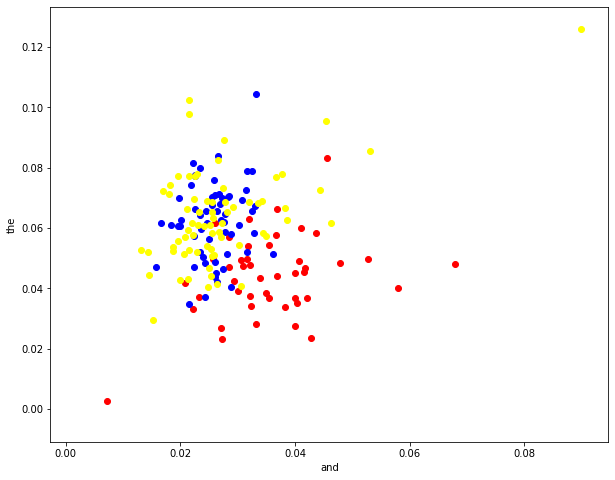

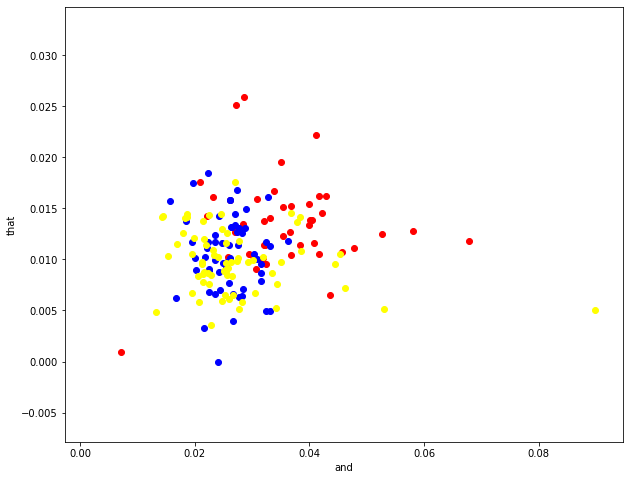

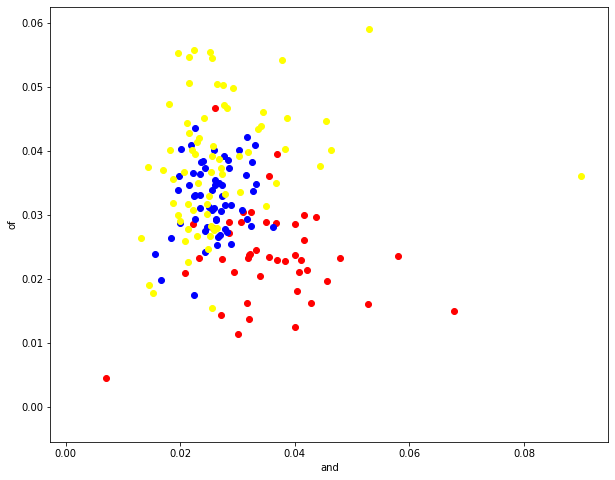

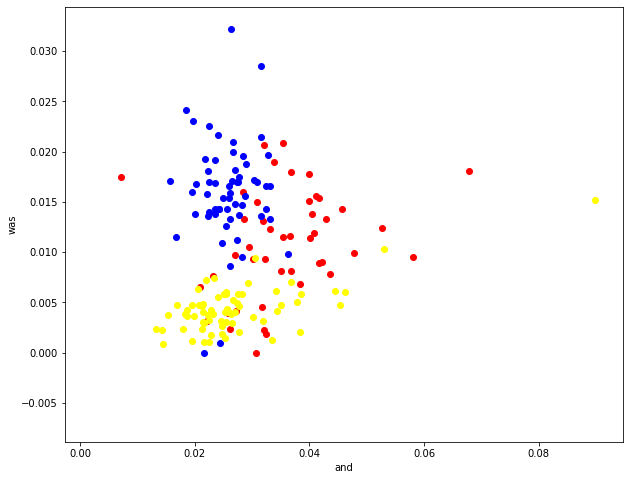

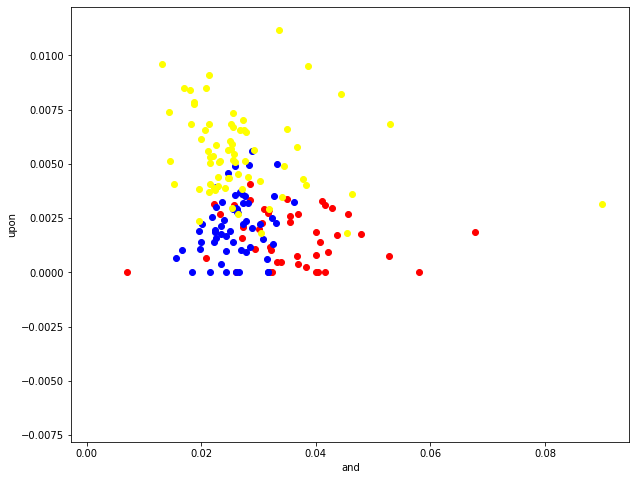

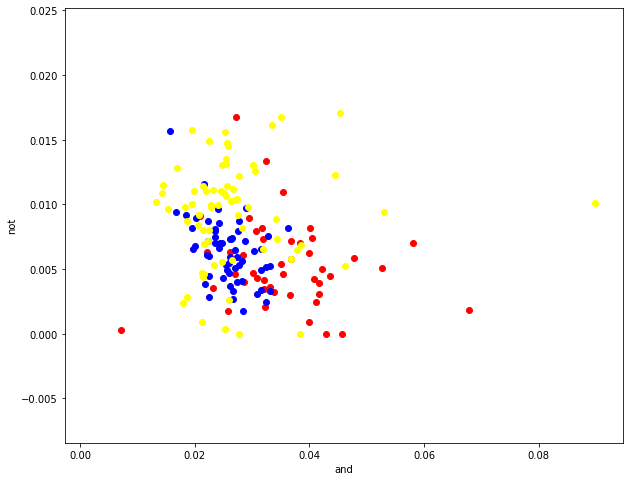

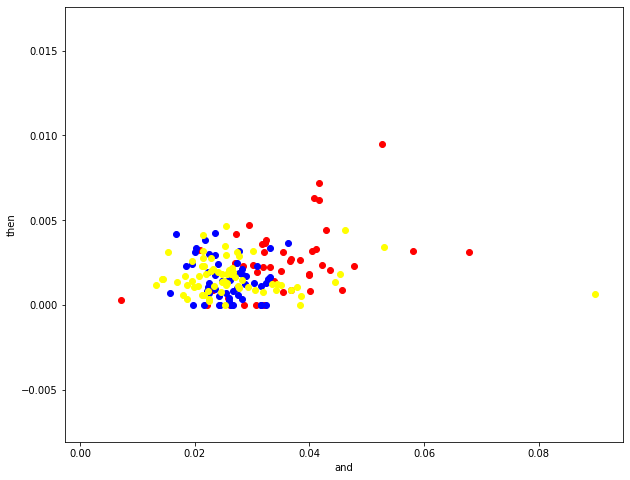

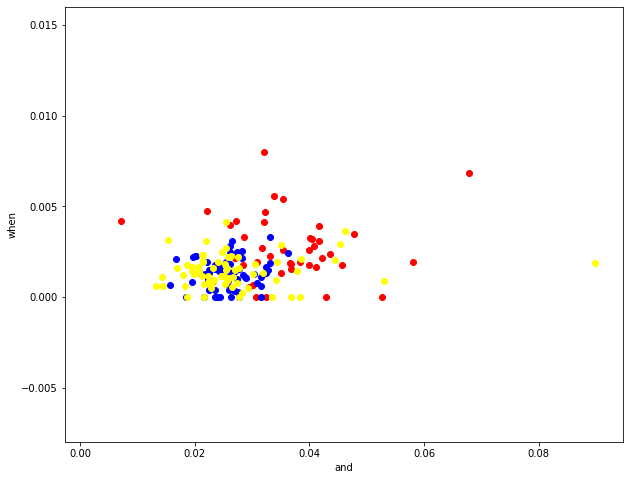

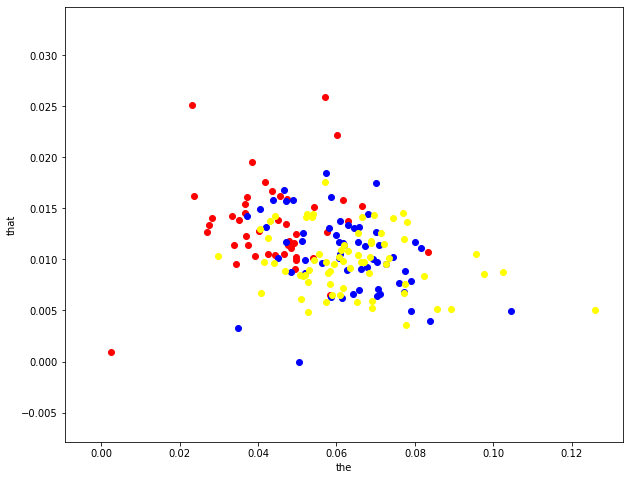

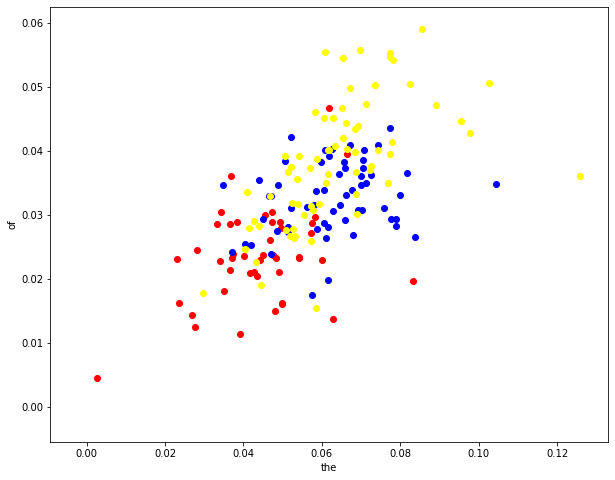

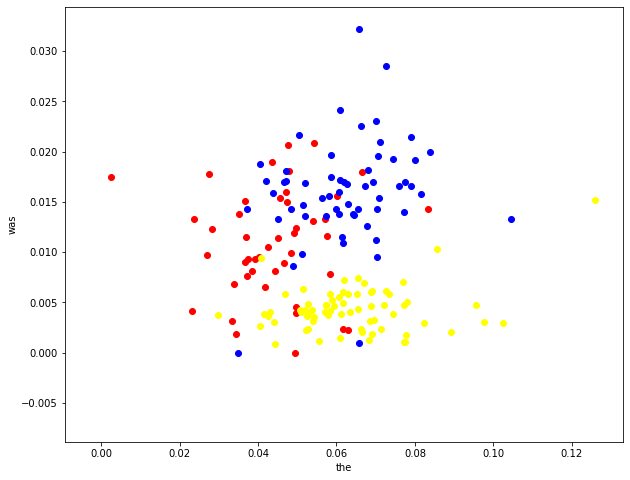

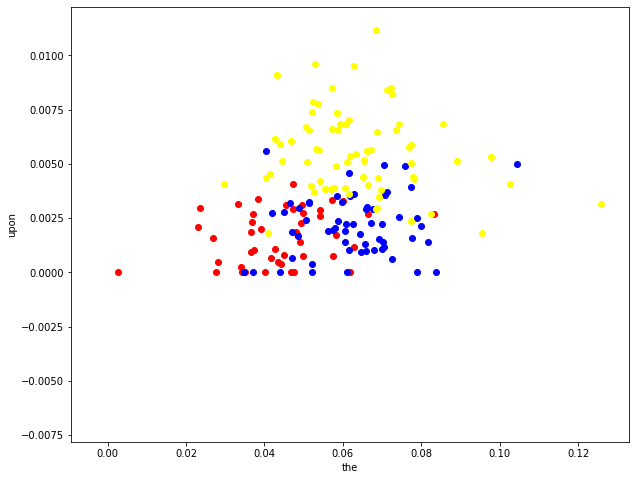

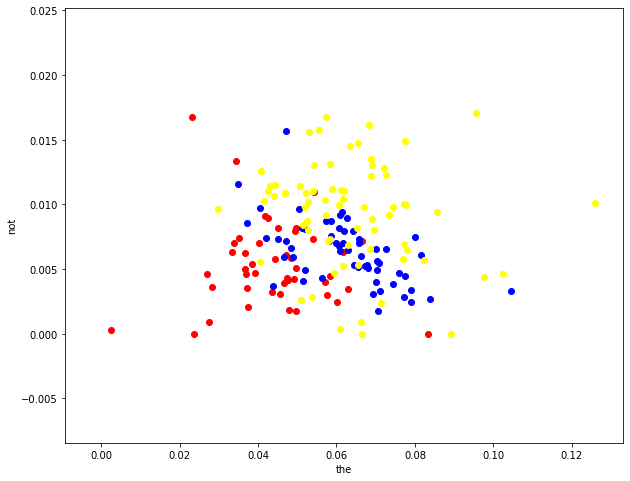

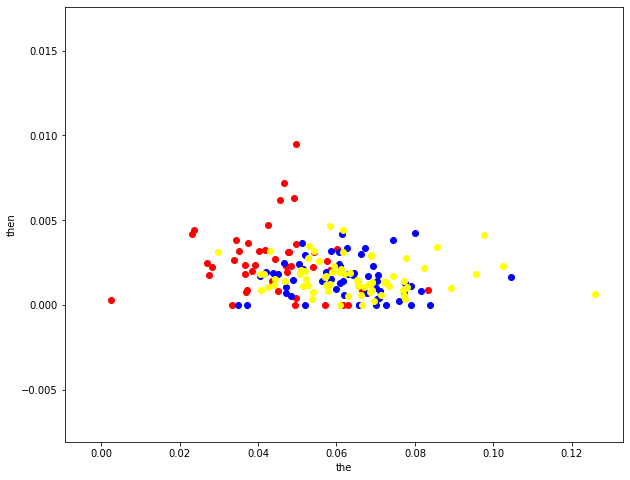

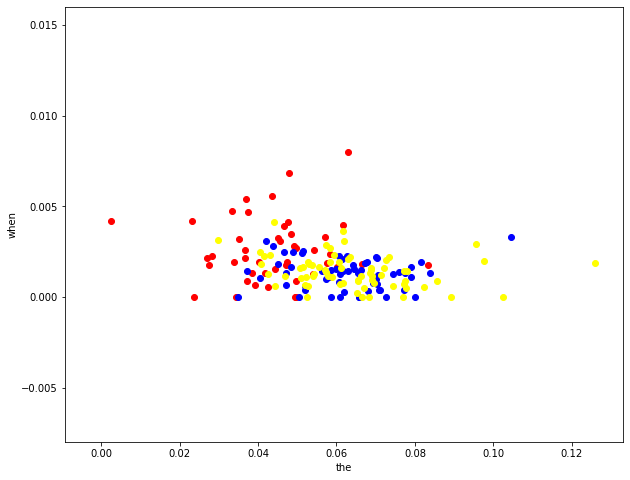

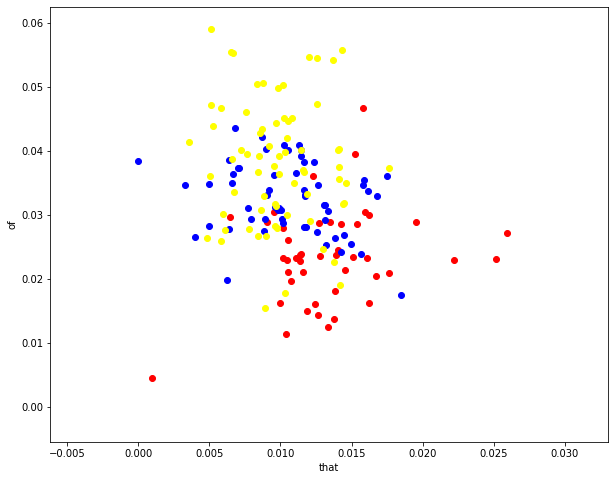

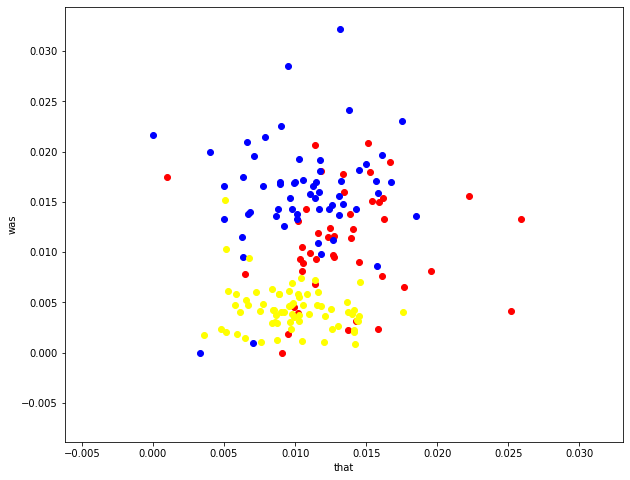

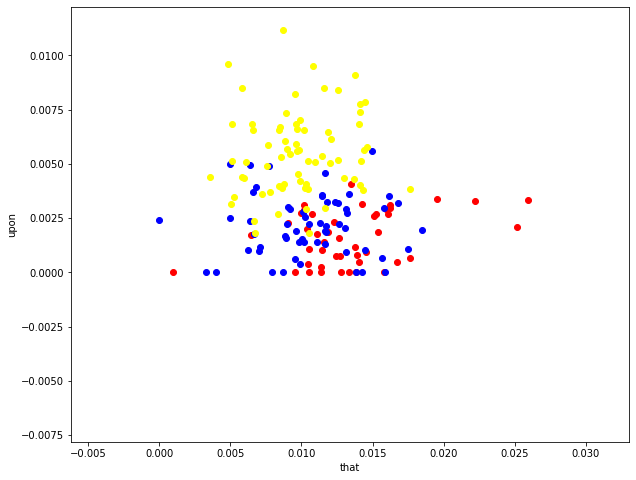

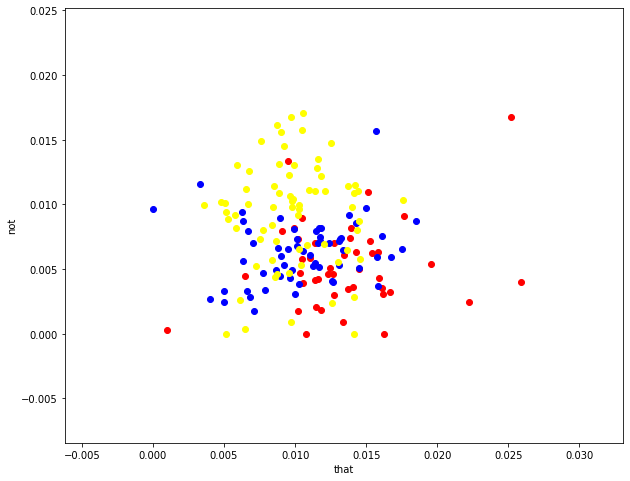

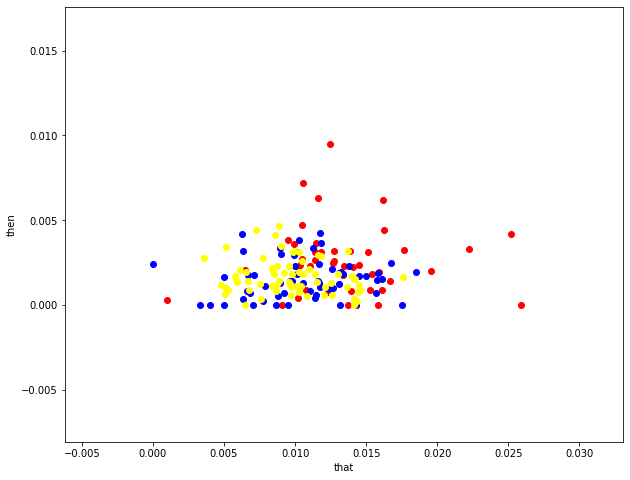

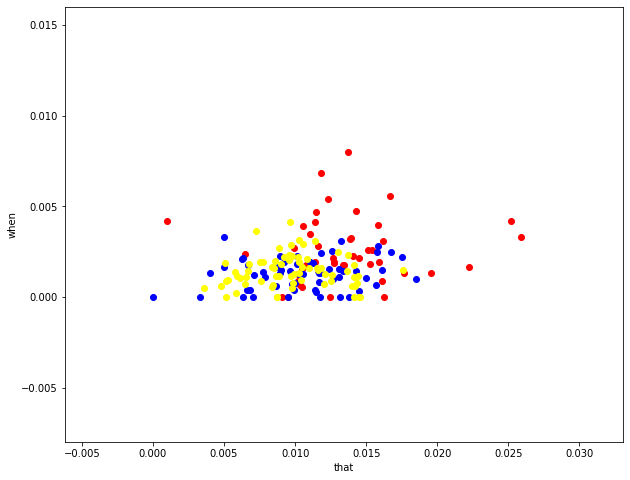

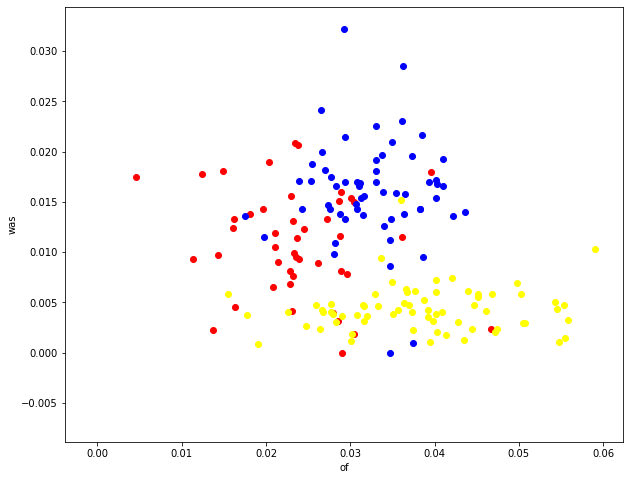

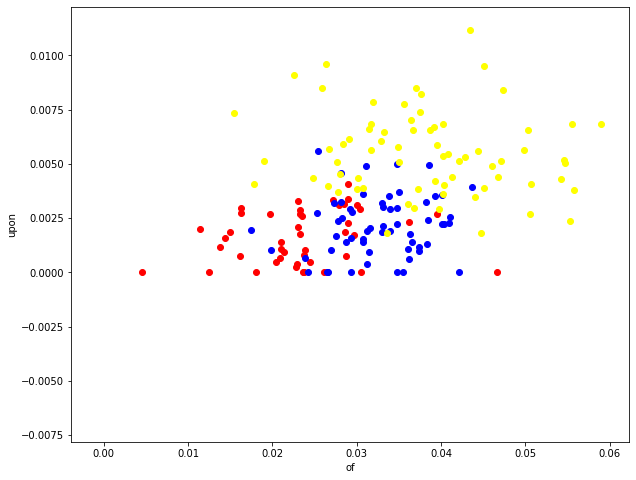

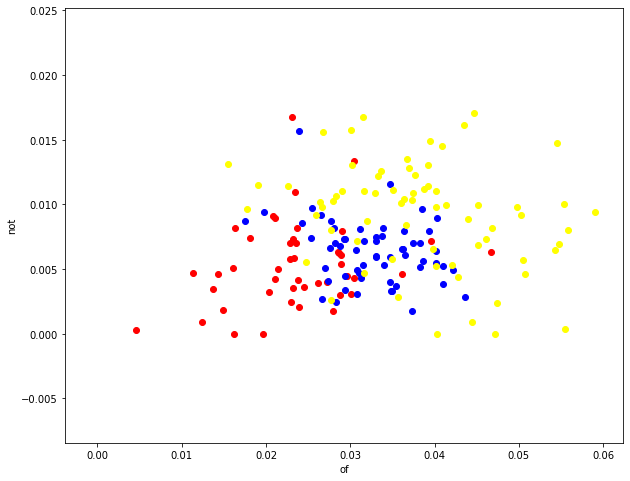

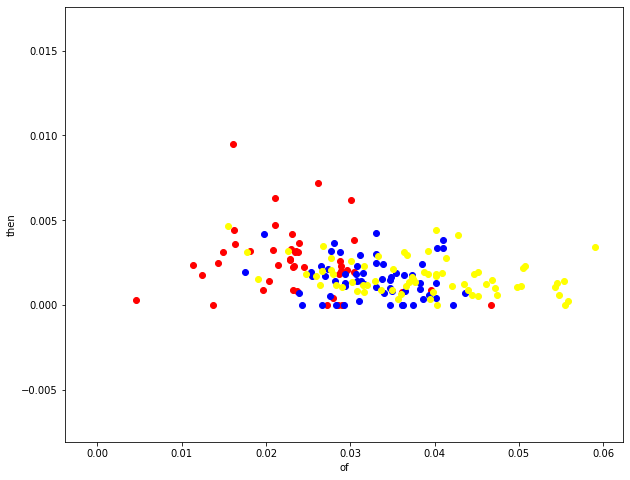

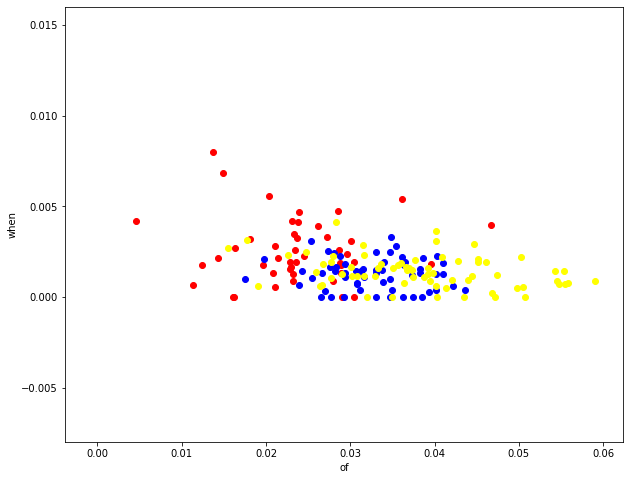

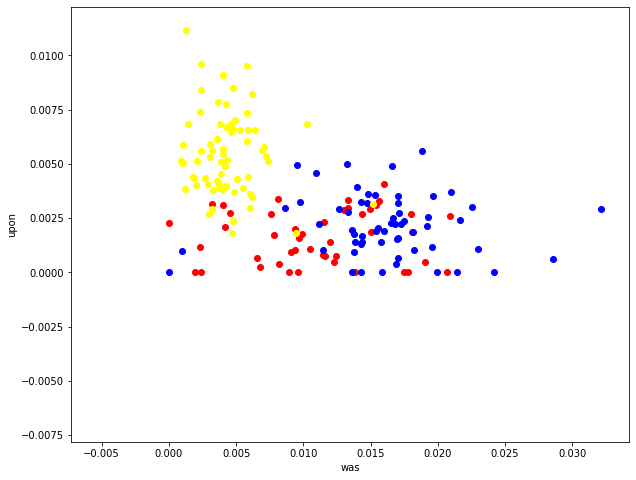

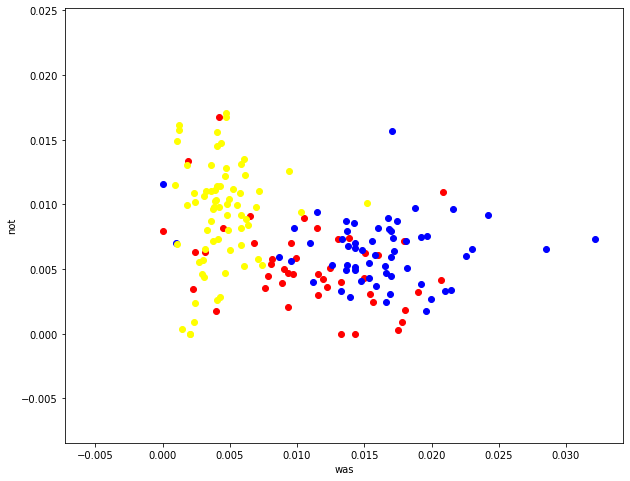

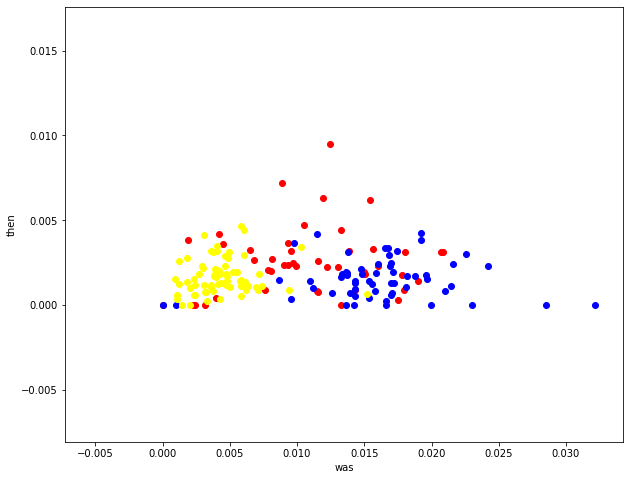

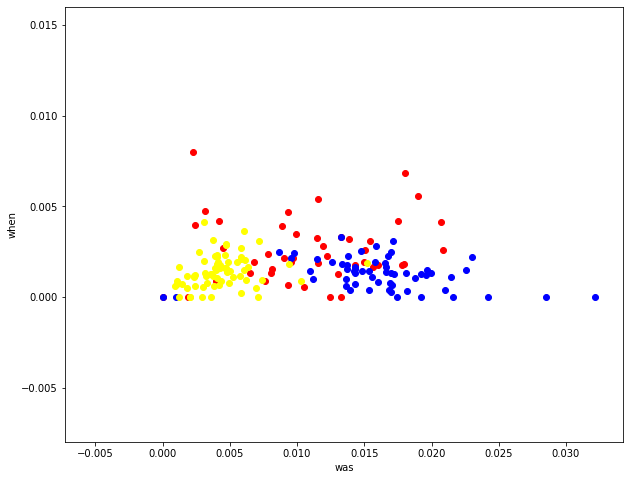

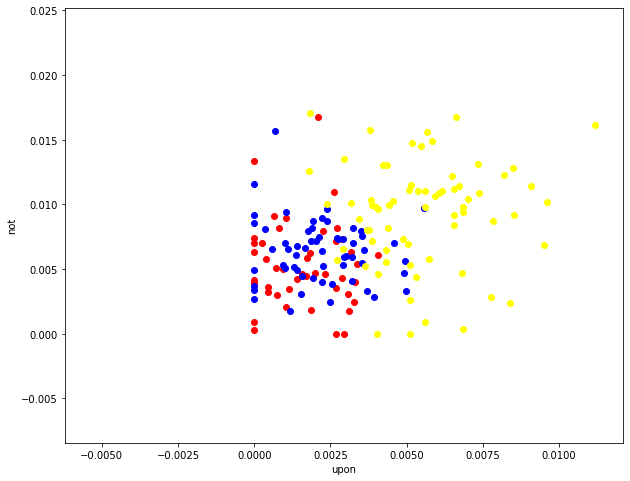

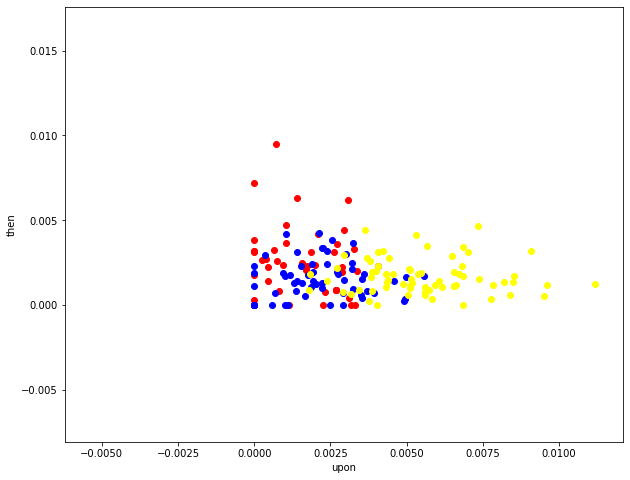

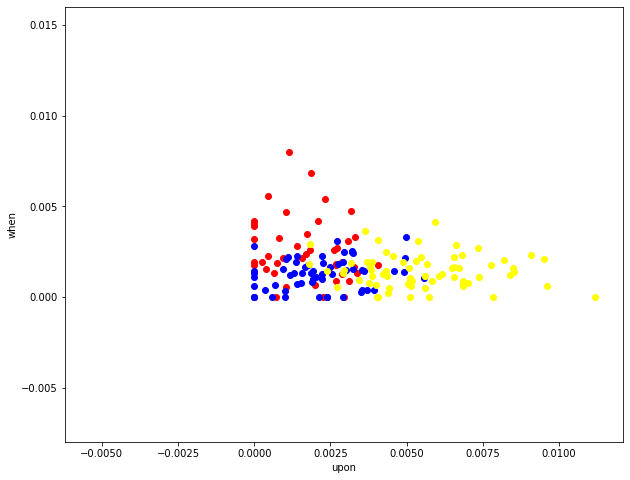

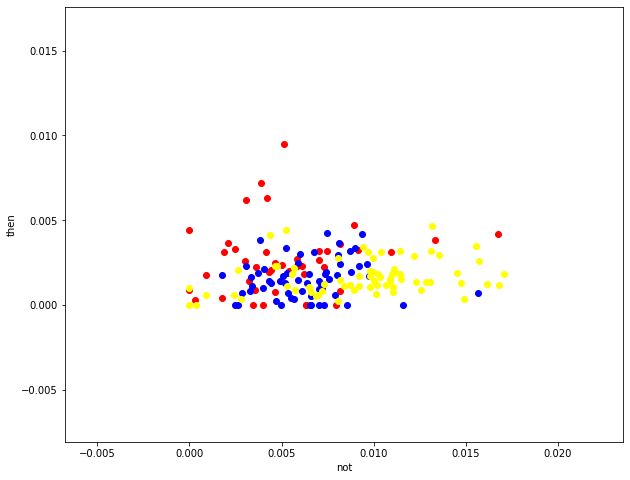

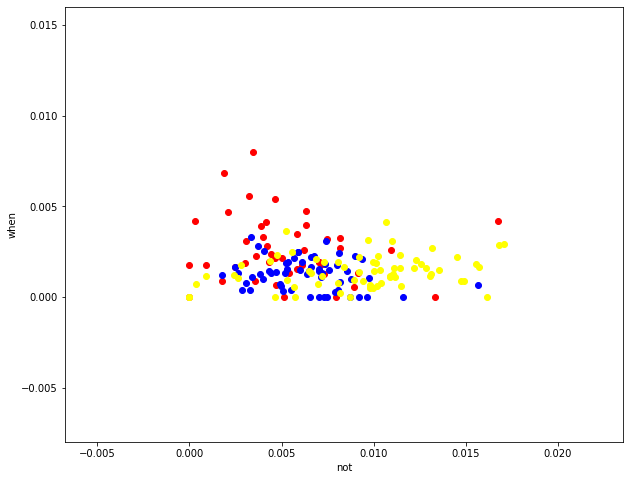

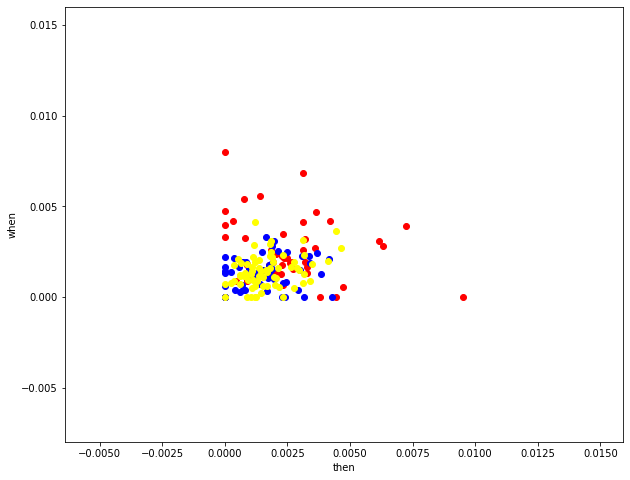

In [28]:
my_makedirs(new_dir_path_png_Combi_n_2)

for index, combi in enumerate(c_list):
    print(index, combi, combi[0],combi[1] ,data_list[6].columns[combi[0]], data_list[6].columns[combi[1]])
    plt.figure(figsize = (10,8))
    
    i = 6
    x,y=data_list[i][data_list[i].columns[combi[0]]],data_list[i][data_list[i].columns[combi[1]]]
    f=data_list[i]['label']

    #plt.plot(x,y,'o',color='black')
    plt.scatter(x,y,c='red')
    plt.xlabel(data_list[i].columns[combi[0]])
    plt.ylabel(data_list[i].columns[combi[1]])
    
    j = 10
    x,y=data_list[j][data_list[j].columns[combi[0]]],data_list[j][data_list[j].columns[combi[1]]]
    f=data_list[j]['label']

    #plt.plot(x,y,'o',color='black')
    plt.scatter(x,y,c='blue')
    #plt.xlabel(data_list[10].columns[combi[0]])
    #plt.ylabel(data_list[10].columns[combi[1]])
    
    k = 2
    x,y=data_list[k][data_list[k].columns[combi[0]]],data_list[k][data_list[k].columns[combi[1]]]
    f=data_list[k]['label']

    #plt.plot(x,y,'o',color='black')
    plt.scatter(x,y,c='yellow')



    #plt.colorbar(label='label')

    title_ =  ("No." + str(i)+ str('_')+str(j) +str('_') + str(k)
               + str(data_list[2].columns[combi[0]])+ str('_')+str(data_list[2].columns[combi[1]]) )
   
    
    filename = new_dir_path_png_Combi_n_2 + "/" + title_ +".png"
    plt.savefig(filename)
  

# MT_methodで異常検知、データ分類

# 学習データを読み込む

# x1と同じように、ほかも正常データの作成

# group1 Poe (x1,y1) # group 2 Twain (x2,y2)

In [29]:
for index, combi in enumerate(c_list):
    print(index, combi, combi[0],combi[1] ,data_list[6].columns[combi[0]], data_list[6].columns[combi[1]])

0 (0, 1) 0 1 and the
1 (0, 2) 0 2 and that
2 (0, 3) 0 3 and of
3 (0, 4) 0 4 and was
4 (0, 5) 0 5 and upon
5 (0, 6) 0 6 and not
6 (0, 7) 0 7 and then
7 (0, 8) 0 8 and when
8 (1, 2) 1 2 the that
9 (1, 3) 1 3 the of
10 (1, 4) 1 4 the was
11 (1, 5) 1 5 the upon
12 (1, 6) 1 6 the not
13 (1, 7) 1 7 the then
14 (1, 8) 1 8 the when
15 (2, 3) 2 3 that of
16 (2, 4) 2 4 that was
17 (2, 5) 2 5 that upon
18 (2, 6) 2 6 that not
19 (2, 7) 2 7 that then
20 (2, 8) 2 8 that when
21 (3, 4) 3 4 of was
22 (3, 5) 3 5 of upon
23 (3, 6) 3 6 of not
24 (3, 7) 3 7 of then
25 (3, 8) 3 8 of when
26 (4, 5) 4 5 was upon
27 (4, 6) 4 6 was not
28 (4, 7) 4 7 was then
29 (4, 8) 4 8 was when
30 (5, 6) 5 6 upon not
31 (5, 7) 5 7 upon then
32 (5, 8) 5 8 upon when
33 (6, 7) 6 7 not then
34 (6, 8) 6 8 not when
35 (7, 8) 7 8 then when


In [30]:
data_num_list = []
for idx_, num in enumerate(sample_list):
    #print(idx_, num)
    #正常データの作成
    x1 = data_list[num]['and']
    y1 = data_list[num]['the']
    
    x1 = np.array(x1)
    y1 = np.array(y1)
    
    x1 = x1.reshape(1,x1.shape[0])
    y1 = y1.reshape(1,y1.shape[0])
    
    #正常データの形を整える
    data_num = []
    data_num.append(x1)
    data_num.append(y1)

    data_num = np.array(data_num)
    
    #data_2 = data_2.reshape(2,69)

    #data_num = data_num.reshape(2,69)

    data_num = data_num.reshape(data_num.shape[0], data_num.shape[2])

    data_num = data_num.transpose()
    
    data_num_list.append(data_num)
    
    data_num_mean_x = sum(data_num[:,0])/len(data_num)
    data_num_mean_x
    data_num_mean_y = sum(data_num[:,1])/len(data_num)
    data_num_mean_y
    
    #print(data_num)
    print(data_num_mean_x, data_num_mean_y)

0.02705189367930958 0.06380704590547144
0.035506299706280095 0.04405095689223954
0.025872950107530178 0.062445450534548315


In [31]:
data_num_list

[array([[0.03830645, 0.06653226],
        [0.03354037, 0.06832298],
        [0.02769231, 0.08923077],
        [0.02127168, 0.05930636],
        [0.02709104, 0.05699482],
        [0.0277674 , 0.06873366],
        [0.01868596, 0.05244123],
        [0.01955174, 0.05555556],
        [0.02669584, 0.05886214],
        [0.02925722, 0.06711249],
        [0.08987342, 0.12594937],
        [0.04542151, 0.09556686],
        [0.02076949, 0.05720123],
        [0.01871469, 0.05367232],
        [0.03670942, 0.0769571 ],
        [0.0233308 , 0.06544006],
        [0.02201524, 0.06181202],
        [0.025733  , 0.06347473],
        [0.02151655, 0.07731117],
        [0.0224938 , 0.07739993],
        [0.02557   , 0.05071383],
        [0.02552204, 0.05839134],
        [0.03855294, 0.06284658],
        [0.0377562 , 0.07802949],
        [0.02142644, 0.05270069],
        [0.0211827 , 0.06619594],
        [0.01696791, 0.07217509],
        [0.01822817, 0.07444232],
        [0.02287956, 0.07779049],
        [0.028

# testデータを読み込む

In [32]:
path_test = str(path_0) + str('/') + str('test_')
path_test

'C:\\Users\\Si\\Desktop\\python_all\\python_NLTK\\nltk\\csv/test_'

In [33]:
path_test = Path(path_test)
path_test
path_test.glob('*.csv')
list(path_test.glob('*.csv'))
print('lists:', path_test.glob('*.csv'))
#list path_test
path_test = list(path_test.glob('*.csv'))
path_test

lists: <generator object Path.glob at 0x000002398F491748>


[WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/test_/test_to_csv_output_test_original.csv'),
 WindowsPath('C:/Users/Si/Desktop/python_all/python_NLTK/nltk/csv/test_/test_to_csv_output_test_percentage.csv')]

In [34]:
data_test = pd.read_table(path_test[1], delimiter=',')
data_test

,Unnamed: 0,and,the,that,of,was,upon,not,then,total
0,column1,0.019169,0.07508,0.007987,0.051118,0.014377,0.004792,0.011182,0.004792,1.0


In [35]:
data_test = data_test.drop(columns = [ data_test.columns[0], data_test.columns[9] ])
data_test

,and,the,that,of,was,upon,not,then
0,0.019169,0.07508,0.007987,0.051118,0.014377,0.004792,0.011182,0.004792


In [36]:
#正常データの作成
x_test = data_test['and']
y_test = data_test['the']



x_test = np.array(x_test)
y_test = np.array(y_test)


x_test = x_test.reshape(x_test.shape[0])
y_test = y_test.reshape(y_test.shape[0])



y_test, y_test.shape

(array([0.07507987]), (1,))

In [37]:
#正常データの形を整える
data_test = []
data_test.append(x_test)
data_test.append(y_test)

data_test = np.array(data_test)
data_test, data_test.shape

(array([[0.01916933],
        [0.07507987]]),
 (2, 1))

In [38]:
data_test = data_test.reshape(1,2)
data_test

array([[0.01916933, 0.07507987]])

# マハラノビス距離 before Decom.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

divide = 2 #状態量の数
R = np.zeros((divide,divide))    #相関行列
invR = np.zeros((divide,divide)) #相関行列の逆行列
avg = np.zeros(divide)           #平均値
std = np.zeros(divide)           #標準偏差
make = 0

p = 0.95        #マハラノビス距離p=0.95で2σ
md_sikii = 2.448#MDの閾値95%で2.448
div = 50        #Mt楕円の分割数

def maha(x):
    global make, R, invR, avg, std

    N, _ = x.shape #Nはデータ数
    xx = np.copy(x)
    xx = np.array(xx,dtype="float32")
    x_return = []

    #各状態量から平均値を引く
    for i in range(divide):
        if make == 0:
            avg[i] = np.mean(x[:,i])
        for j in range(N):
            xx[j,i] = xx[j,i] - avg[i]

    #各状態量を標準偏差で割る
    for i in range(divide):
        if make == 0:
            std[i] = np.std(x[:,i])
        for j in range(N):
            xx[j,i] = xx[j,i] / std[i]

    #make=0のときだけ計算
    if make == 0:
        R = np.corrcoef(xx.transpose())
        invR = np.linalg.inv(R)
        make = 1

    #MD^2の計算
    for i in range(N):
        d0 = xx[i,:]
        d1 = np.dot(d0,invR)
        d2 = np.dot(d1,d0)/divide
        x_return.append(d2)

    return x_return



In [40]:
# 単位空間の作成
#data_2 = > data_num_list[0]

In [41]:
for idx_, num in enumerate(sample_list):
    print(idx_, num)

0 2
1 6
2 10


In [42]:


#単位空間の作成
avg_xlist = []
std_xlist = []

avg_ylist = []
std_ylist = []

md_list = []
for idx_, num in enumerate(sample_list):
    #print(idx_, num)
    _ = maha(data_num_list[idx_])
    avg_1_x = avg[0]
    avg_1_y = avg[1]
    print(avg_1_x ,avg_1_y)
    avg_xlist.append(avg_1_x)
    avg_ylist.append(avg_1_y)
    
    std_1_x = std[0]
    std_1_y = std[1]
    print(std_1_x ,std_1_y)
    std_xlist.append(std_1_x)
    std_ylist.append(std_1_y)

    #テストデータのマハラノビス距離
    md_1 = maha(data_test)
    print('md:',idx_,md_1)
    md_list.append(md_1)
    
    #initialisation of parameters
    divide = 2 #状態量の数
    R = np.zeros((divide,divide))    #相関行列
    invR = np.zeros((divide,divide)) #相関行列の逆行列
    avg = np.zeros(divide)           #平均値
    std = np.zeros(divide)           #標準偏差
    make = 0

0.02705189367930958 0.06380704590547145
0.010826372294302652 0.01584637604211068
md: 0 [1.118909493487077]
0.03550629970628009 0.04405095689223954
0.00995689393148243 0.013397018378760265
md: 1 [5.802726171002479]
0.02587295010753017 0.06244545053454831
0.004266783883842671 0.012860704258934437
md: 2 [2.0367698015357925]


In [43]:
avg_xlist, avg_ylist

([0.02705189367930958, 0.03550629970628009, 0.02587295010753017],
 [0.06380704590547145, 0.04405095689223954, 0.06244545053454831])

In [44]:
std_xlist, std_ylist

([0.010826372294302652, 0.00995689393148243, 0.004266783883842671],
 [0.01584637604211068, 0.013397018378760265, 0.012860704258934437])

In [45]:
md_list

[[1.118909493487077], [5.802726171002479], [2.0367698015357925]]

# 正規分布の等高線（0.95）をかく

In [46]:
avg_xlist, avg_ylist

([0.02705189367930958, 0.03550629970628009, 0.02587295010753017],
 [0.06380704590547145, 0.04405095689223954, 0.06244545053454831])

In [47]:
std_xlist, std_ylist

([0.010826372294302652, 0.00995689393148243, 0.004266783883842671],
 [0.01584637604211068, 0.013397018378760265, 0.012860704258934437])

In [48]:
low_num_list = []
curve_c_num_list = []
for idx_, num in enumerate(sample_list):
    print(idx_, num)
    print(data_num_list[idx_][:,0],'\n',data_num_list[idx_][:,1])

    #楕円のデータ
    low_num = np.corrcoef(data_num_list[idx_][:,0], data_num_list[idx_][:,1])[0,1]
    low_num_list.append(low_num)
    
    #楕円半径の計算　Poe 
    #p=0.95に対応する楕円

    curve_c_num = np.zeros((2,div+1))
    for i in range(div+1):
        r = (-2*(1-low_num_list[idx_]**2)*np.log(1-p)/(1-2*low_num_list[idx_]*np.sin(i*2*np.pi/div)*np.cos(i*2*np.pi/div)))**0.5
        curve_c_num[0,i] = avg_xlist[idx_] + std_xlist[idx_] *r*np.cos(i*2*np.pi/div)
        curve_c_num[1,i] = avg_ylist[idx_] + std_ylist[idx_] *r*np.sin(i*2*np.pi/div)

        #print(r)
    curve_c_num_list.append(curve_c_num)

0 2
[0.03830645 0.03354037 0.02769231 0.02127168 0.02709104 0.0277674
 0.01868596 0.01955174 0.02669584 0.02925722 0.08987342 0.04542151
 0.02076949 0.01871469 0.03670942 0.0233308  0.02201524 0.025733
 0.02151655 0.0224938  0.02557    0.02552204 0.03855294 0.0377562
 0.02142644 0.0211827  0.01696791 0.01822817 0.02287956 0.02820138
 0.04445964 0.02522523 0.02156177 0.01956107 0.02470265 0.03437348
 0.02134855 0.02545615 0.02458858 0.02313762 0.02744879 0.04625905
 0.03019426 0.02500439 0.03418182 0.01530294 0.03190928 0.03050695
 0.01451028 0.02648649 0.0253765  0.02222686 0.0247678  0.03501301
 0.02407971 0.02589195 0.02287872 0.0142923  0.01320528 0.02527473
 0.0206054  0.01993637 0.02638162 0.02238431 0.02145723 0.01798561
 0.02730109 0.02554113 0.05303678] 
 [0.06653226 0.06832298 0.08923077 0.05930636 0.05699482 0.06873366
 0.05244123 0.05555556 0.05886214 0.06711249 0.12594937 0.09556686
 0.05720123 0.05367232 0.0769571  0.06544006 0.06181202 0.06347473
 0.07731117 0.07739993 0.

In [49]:
low_num_list

[0.537013110439081, 0.315221526798619, 0.1694408341670984]

In [50]:
len(curve_c_num_list), curve_c_num_list[0]

(3,
 array([[0.04940679, 0.05087853, 0.05220055, 0.05318908, 0.05354909,
         0.05290757, 0.05097407, 0.04778196, 0.04375799, 0.03948344,
         0.03540245, 0.03172846, 0.02850533, 0.0256932 , 0.02322429,
         0.02102928, 0.01904679, 0.01722533, 0.0155224 , 0.0139029 ,
         0.01233769, 0.01080262, 0.00927852, 0.00775235, 0.0062207 ,
         0.004697  , 0.00322526, 0.00190323, 0.0009147 , 0.0005547 ,
         0.00119622, 0.00312972, 0.00632183, 0.0103458 , 0.01462035,
         0.01870134, 0.02237533, 0.02559845, 0.02841059, 0.0308795 ,
         0.03307451, 0.035057  , 0.03687846, 0.03858139, 0.04020088,
         0.0417661 , 0.04330116, 0.04482527, 0.04635144, 0.04788309,
         0.04940679],
        [0.06380705, 0.06821274, 0.07325816, 0.07895389, 0.08512845,
         0.09130269, 0.09668783, 0.10048451, 0.1023379 , 0.10247518,
         0.10142423, 0.09968985, 0.0976207 , 0.09541653, 0.09317585,
         0.09093743, 0.08870679, 0.08647098, 0.08420605, 0.0818802 ,
        

In [51]:
data_num_list[0]

array([[0.03830645, 0.06653226],
       [0.03354037, 0.06832298],
       [0.02769231, 0.08923077],
       [0.02127168, 0.05930636],
       [0.02709104, 0.05699482],
       [0.0277674 , 0.06873366],
       [0.01868596, 0.05244123],
       [0.01955174, 0.05555556],
       [0.02669584, 0.05886214],
       [0.02925722, 0.06711249],
       [0.08987342, 0.12594937],
       [0.04542151, 0.09556686],
       [0.02076949, 0.05720123],
       [0.01871469, 0.05367232],
       [0.03670942, 0.0769571 ],
       [0.0233308 , 0.06544006],
       [0.02201524, 0.06181202],
       [0.025733  , 0.06347473],
       [0.02151655, 0.07731117],
       [0.0224938 , 0.07739993],
       [0.02557   , 0.05071383],
       [0.02552204, 0.05839134],
       [0.03855294, 0.06284658],
       [0.0377562 , 0.07802949],
       [0.02142644, 0.05270069],
       [0.0211827 , 0.06619594],
       [0.01696791, 0.07217509],
       [0.01822817, 0.07444232],
       [0.02287956, 0.07779049],
       [0.02820138, 0.06517652],
       [0.

In [52]:
color_list

['red', 'blue', 'yellow']

In [53]:
for idx_, num in enumerate(sample_list):
    print(idx_, num)
    print(data_num_list[idx_][:,0],'\n',data_num_list[idx_][:,1])

0 2
[0.03830645 0.03354037 0.02769231 0.02127168 0.02709104 0.0277674
 0.01868596 0.01955174 0.02669584 0.02925722 0.08987342 0.04542151
 0.02076949 0.01871469 0.03670942 0.0233308  0.02201524 0.025733
 0.02151655 0.0224938  0.02557    0.02552204 0.03855294 0.0377562
 0.02142644 0.0211827  0.01696791 0.01822817 0.02287956 0.02820138
 0.04445964 0.02522523 0.02156177 0.01956107 0.02470265 0.03437348
 0.02134855 0.02545615 0.02458858 0.02313762 0.02744879 0.04625905
 0.03019426 0.02500439 0.03418182 0.01530294 0.03190928 0.03050695
 0.01451028 0.02648649 0.0253765  0.02222686 0.0247678  0.03501301
 0.02407971 0.02589195 0.02287872 0.0142923  0.01320528 0.02527473
 0.0206054  0.01993637 0.02638162 0.02238431 0.02145723 0.01798561
 0.02730109 0.02554113 0.05303678] 
 [0.06653226 0.06832298 0.08923077 0.05930636 0.05699482 0.06873366
 0.05244123 0.05555556 0.05886214 0.06711249 0.12594937 0.09556686
 0.05720123 0.05367232 0.0769571  0.06544006 0.06181202 0.06347473
 0.07731117 0.07739993 0.

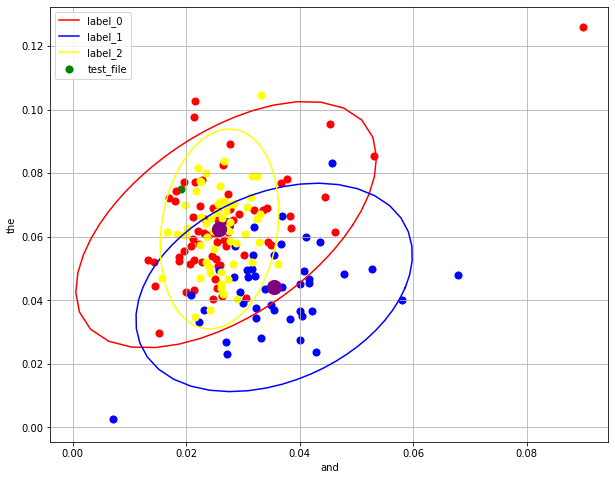

In [54]:
my_makedirs(new_dir_path_png_Combi_n_2)
plt.figure(figsize = (10,8))
plt.scatter(data_test[0][0],data_test[0][1],c="green", s=50, label = 'test_file')

for idx_, num in enumerate(sample_list):
    

    x1 = data_num_list[idx_][:,0]
    y1 = data_num_list[idx_][:,1]
    #plt.subplot(1,2,1)
    plt.scatter(x1, y1, c=color_list[idx_], s=50)
    plt.plot(curve_c_num_list[idx_][0],curve_c_num_list[idx_][1],c=color_list[idx_],label="label_" + str(idx_))
    plt.scatter([avg_xlist[idx_]], [avg_ylist[idx_]], c="purple", s=200)
    plt.xlabel("and")
    plt.ylabel("the")

    plt.grid(True)
    plt.legend(loc='upper left')
    title_ =  ("No." + str(sample_list) +str('_')
               + str('and')+ str('_')+str('the') )
   
    
    filename = new_dir_path_png_Mahalanobis + "/" + title_ +".png"
    plt.savefig(filename)
    
    
    

In [55]:
md_list[1][0]

5.802726171002479

In [56]:
md_list

[[1.118909493487077], [5.802726171002479], [2.0367698015357925]]

No handles with labels found to put in legend.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


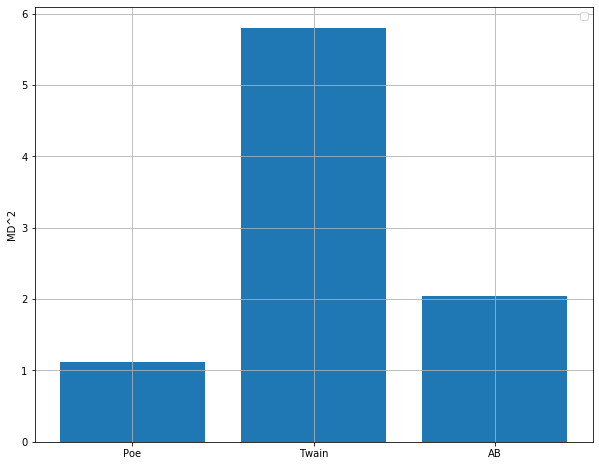

In [57]:
#可視化
plt.figure(figsize = (10,8))
plt.legend()

plt.subplot()
plt.bar([1,2,3], [md_list[0][0], md_list[1][0], md_list[2][0]], align="center")

plt.xticks([1,2, 3], ["Poe", "Twain",'AB'])
plt.ylabel("MD^2")
plt.grid(True)

my_makedirs(new_dir_path_png_Mahalanobis)

filename = new_dir_path_png_Mahalanobis + "/" + title_ +"bar.png"
plt.savefig(filename)
  

# 可視化

# その他の次元についてもMahalanobis距離を計算（自動化コード構築）

# Machine_Learing_Algorithm

# DecisionTreeClassifier

# LDA

# PCA

# 次元圧縮を行ったバージョン

# Poe_letter

# Twin_letter

In [58]:
data_list[2]

,and,the,that,of,upon,not,was,when,then,label
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,0
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,0
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,0
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,0
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,0
...,...,...,...,...,...,...,...,...,...,...
64,0.021457,0.097677,0.008583,0.042821,0.003079,0.005318,0.004385,0.004105,0.001959,0
65,0.017986,0.071343,0.012590,0.047362,0.002398,0.008393,0.002398,0.000600,0.001199,0
66,0.027301,0.061622,0.009880,0.036401,0.004940,0.007020,0.010400,0.003120,0.000780,0
67,0.025541,0.065368,0.012554,0.054545,0.004329,0.005195,0.014719,0.001299,0.000866,0


In [59]:
sample_list
color_list = ['red','blue','yellow']
color_list

for idx_, num in enumerate(sample_list):
    print(idx_, num)
    #data_num = data_list[num].copy()

data_num_list

0 2
1 6
2 10


[array([[0.03830645, 0.06653226],
        [0.03354037, 0.06832298],
        [0.02769231, 0.08923077],
        [0.02127168, 0.05930636],
        [0.02709104, 0.05699482],
        [0.0277674 , 0.06873366],
        [0.01868596, 0.05244123],
        [0.01955174, 0.05555556],
        [0.02669584, 0.05886214],
        [0.02925722, 0.06711249],
        [0.08987342, 0.12594937],
        [0.04542151, 0.09556686],
        [0.02076949, 0.05720123],
        [0.01871469, 0.05367232],
        [0.03670942, 0.0769571 ],
        [0.0233308 , 0.06544006],
        [0.02201524, 0.06181202],
        [0.025733  , 0.06347473],
        [0.02151655, 0.07731117],
        [0.0224938 , 0.07739993],
        [0.02557   , 0.05071383],
        [0.02552204, 0.05839134],
        [0.03855294, 0.06284658],
        [0.0377562 , 0.07802949],
        [0.02142644, 0.05270069],
        [0.0211827 , 0.06619594],
        [0.01696791, 0.07217509],
        [0.01822817, 0.07444232],
        [0.02287956, 0.07779049],
        [0.028

# Poe_story + Twain_story+test02

In [60]:
num_list = []
for idx_, num in enumerate(sample_list):
    print(idx_, num)
    num_list.append(num)
num_list

0 2
1 6
2 10


[2, 6, 10]

In [61]:
sample_list[1:]

[6, 10]

In [62]:

df_merged = data_list[num_list[0]].copy()
for idx_, num in enumerate(sample_list[1:]):
    print(idx_, num)
    df_merged = pd.concat([df_merged, data_list[num]])
    df_merged.reset_index(drop=True, inplace=True)
df_merged 
    


0 6
1 10


,and,the,that,of,upon,not,was,when,then,label
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,0
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,0
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,0
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,0
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,0
...,...,...,...,...,...,...,...,...,...,...
168,0.027302,0.069993,0.012658,0.034748,0.002234,0.003971,0.011169,0.000993,0.000993,2
169,0.025974,0.070838,0.011413,0.040142,0.003542,0.005510,0.015348,0.000394,0.000394,2
170,0.024988,0.056223,0.009611,0.031235,0.001922,0.004325,0.015377,0.001442,0.001442,2
171,0.033070,0.067268,0.011274,0.040962,0.002255,0.005261,0.016535,0.003382,0.001879,2


In [63]:
df_merged_copy = df_merged.copy()
df_merged_copy 

,and,the,that,of,upon,not,was,when,then,label
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,0
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,0
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,0
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,0
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,0
...,...,...,...,...,...,...,...,...,...,...
168,0.027302,0.069993,0.012658,0.034748,0.002234,0.003971,0.011169,0.000993,0.000993,2
169,0.025974,0.070838,0.011413,0.040142,0.003542,0.005510,0.015348,0.000394,0.000394,2
170,0.024988,0.056223,0.009611,0.031235,0.001922,0.004325,0.015377,0.001442,0.001442,2
171,0.033070,0.067268,0.011274,0.040962,0.002255,0.005261,0.016535,0.003382,0.001879,2


In [64]:
#read test file

In [65]:
path_test = str(path_0) + str('/') + str('test_')
path_test
path_test = Path(path_test)
path_test
path_test.glob('*.csv')
list(path_test.glob('*.csv'))
print('lists:', path_test.glob('*.csv'))
#list path_test
path_test = list(path_test.glob('*.csv'))
path_test
data_test = pd.read_table(path_test[1], delimiter=',')
data_test


lists: <generator object Path.glob at 0x00000239905A4148>


,Unnamed: 0,and,the,that,of,was,upon,not,then,total
0,column1,0.019169,0.07508,0.007987,0.051118,0.014377,0.004792,0.011182,0.004792,1.0


In [66]:
data_test = data_test.drop(columns = [data_test.columns[0], data_test.columns[9] ])
data_test['label'] = -1
data_test

,and,the,that,of,was,upon,not,then,label
0,0.019169,0.07508,0.007987,0.051118,0.014377,0.004792,0.011182,0.004792,-1


In [67]:
df_all = pd.concat([df_merged_copy, data_test])
df_all.reset_index(drop=True, inplace=True)
df_all = df_all.fillna(0)
df_all

,and,the,that,of,upon,not,was,when,then,label
0,0.038306,0.066532,0.014113,0.040323,0.002016,0.004032,0.000000,0.000000,0.000000,0
1,0.033540,0.068323,0.008696,0.043478,0.001242,0.011180,0.016149,0.001242,0.000000,0
2,0.027692,0.089231,0.005128,0.047179,0.002051,0.005128,0.000000,0.001026,0.000000,0
3,0.021272,0.059306,0.009595,0.031676,0.004624,0.006821,0.004740,0.002312,0.002312,0
4,0.027091,0.056995,0.017617,0.037306,0.003997,0.003849,0.010363,0.001628,0.001480,0
...,...,...,...,...,...,...,...,...,...,...
169,0.025974,0.070838,0.011413,0.040142,0.003542,0.005510,0.015348,0.000394,0.000394,2
170,0.024988,0.056223,0.009611,0.031235,0.001922,0.004325,0.015377,0.001442,0.001442,2
171,0.033070,0.067268,0.011274,0.040962,0.002255,0.005261,0.016535,0.003382,0.001879,2
172,0.027760,0.064566,0.013100,0.031503,0.000936,0.005303,0.013724,0.001871,0.001560,2


In [68]:
df_all.columns

Index(['and', 'the', 'that', 'of', 'upon', 'not', 'was', 'when', 'then',
       'label'],
      dtype='object')

In [69]:
df_label_series=df_all['label']
df_label = pd.DataFrame(df_label_series)
df_label

,label
0,0
1,0
2,0
3,0
4,0
...,...
169,2
170,2
171,2
172,2


df_all_shape:(174, 9)
X_train:(174, 9)
pca.singular_values_:[0.23670626 0.13241151]
pca.explained_variance_ratio_:[0.61094186 0.19117533]
pca_MEAN:[0.02879332 0.05830081 0.01099294 0.03260218 0.00291328 0.00578775
 0.01203023 0.00186152 0.00169586]
pca_X:[[ 1.08674342e-02  6.55149457e-03]
 [ 1.37829156e-02  1.50152217e-03]
 [ 3.43426083e-02 -3.82709449e-03]
 [ 2.76726376e-04 -7.08615831e-03]
 [ 2.45441403e-04 -2.93724796e-03]
 [ 9.67638721e-03 -1.16780266e-04]
 [-6.31436129e-03 -1.00661685e-02]
 [-3.99539171e-03 -7.76525888e-03]
 [ 3.31309075e-03 -4.13434057e-03]
 [ 1.53027581e-02 -4.44637936e-03]
 [ 6.69792450e-02  6.24787013e-02]
 [ 3.97630258e-02  1.57984669e-02]
 [-3.70967324e-03 -5.94276807e-03]
 [-3.68204898e-03 -1.13871462e-02]
 [ 1.82565459e-02  8.17843077e-03]
 [ 1.03337432e-02 -7.81290868e-03]
 [ 6.08124215e-03 -8.29571476e-03]
 [ 8.07876677e-03 -4.89268760e-03]
 [ 2.57438365e-02 -1.25035481e-02]
 [ 2.00323148e-02 -6.40634814e-03]
 [-4.15153436e-03 -6.03555899e-03]
 [-6.82342

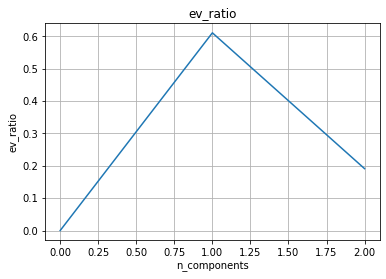

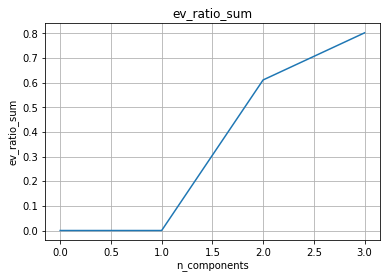

array([0.        , 0.61094186, 0.19117533])

In [70]:
#PCA
#label=df_all.label
#print(label.shape, df_all.shape)
df_all =df_all.drop('label', axis =1)
df_all

#X_train,x_test,Y_train,y_test=train_test_split(df_all, label , test_size = 0.0001, random_state = 666)
#df_allnp=df_all.values
#df_allnp.shape
#df_allnp

X_train = df_all.copy()
pca=PCA(n_components=2)
pca.fit(X_train)
pca_X=pca.transform(X_train)

print("df_all_shape:"+ str(df_all.shape))
print("X_train:"+ str(X_train.shape))
#print("Y_train:"+ str(Y_train.shape))

print("pca.singular_values_:"+ str(pca.singular_values_))
print("pca.explained_variance_ratio_:"+ str(pca.explained_variance_ratio_))
print("pca_MEAN:"+ str(pca.mean_))
print("pca_X:"+ str(pca_X))

ev_ratio = pca.explained_variance_ratio_
ev_ratio
ev_ratio = np.hstack([0,ev_ratio])
plt.title("ev_ratio")
plt.plot(ev_ratio)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio_sum = np.hstack([0,ev_ratio.cumsum()])
plt.title("ev_ratio_sum")
plt.plot(ev_ratio_sum)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio_sum')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio




In [71]:
pca_X.shape

(174, 2)

In [72]:
pca_X_list = pca_X.tolist()
pca_X_list

[[0.010867434192470085, 0.006551494567077351],
 [0.013782915595265165, 0.0015015221737496615],
 [0.03434260826496916, -0.0038270944887606063],
 [0.0002767263757581932, -0.007086158314747518],
 [0.00024544140256301135, -0.002937247960754353],
 [0.0096763872110504, -0.00011678026596286007],
 [-0.006314361292640069, -0.010066168539875572],
 [-0.003995391713348796, -0.007765258879804935],
 [0.0033130907479988923, -0.0041343405699710975],
 [0.015302758098828577, -0.0044463793586680565],
 [0.0669792450066941, 0.06247870126720874],
 [0.03976302580734415, 0.015798466929189726],
 [-0.003709673239064486, -0.0059427680710568325],
 [-0.003682048982230368, -0.011387146221117275],
 [0.018256545898678287, 0.008178430768282294],
 [0.01033374315570827, -0.007812908679451728],
 [0.006081242147085177, -0.008295714755041749],
 [0.008078766768045186, -0.004892687600135261],
 [0.025743836463616145, -0.01250354811823896],
 [0.02003231479352832, -0.0064063481404453785],
 [-0.0041515343625936575, -0.0060355589

In [73]:
df_all_decom = pd.DataFrame(pca_X_list)
df_all_decom

,0,1
0,0.010867,0.006551
1,0.013783,0.001502
2,0.034343,-0.003827
3,0.000277,-0.007086
4,0.000245,-0.002937
...,...,...
169,0.014370,-0.003751
170,-0.002522,-0.003122
171,0.011686,0.002475
172,0.004965,0.000139


In [74]:
df_decom = pd.concat([df_all_decom, df_label], axis =1)
df_decom.reset_index(drop=True, inplace=True)
#df_decom = df.fillna(0)
df_decom

,0,1,label
0,0.010867,0.006551,0
1,0.013783,0.001502,0
2,0.034343,-0.003827,0
3,0.000277,-0.007086,0
4,0.000245,-0.002937,0
...,...,...,...
169,0.014370,-0.003751,2
170,-0.002522,-0.003122,2
171,0.011686,0.002475,2
172,0.004965,0.000139,2


In [75]:
#label setting
df_decom_list = []
for idx_, num in enumerate(sample_list):
    print(idx_, num)
    df_decom_num = df_decom[df_decom.label == idx_]
    df_decom_list.append(df_decom_num)


0 2
1 6
2 10


In [76]:
df_decom_list[0], df_decom_list[1], df_decom_list[2], 

(           0         1  label
 0   0.010867  0.006551      0
 1   0.013783  0.001502      0
 2   0.034343 -0.003827      0
 3   0.000277 -0.007086      0
 4   0.000245 -0.002937      0
 ..       ...       ...    ...
 64  0.039651 -0.006857      0
 65  0.017082 -0.014379      0
 66  0.004627 -0.002494      0
 67  0.015143 -0.009243      0
 68  0.037388  0.016407      0
 
 [69 rows x 3 columns],
             0         1  label
 69  -0.013564  0.027316      1
 70  -0.021074  0.010010      1
 71  -0.036231  0.001360      1
 72  -0.002012  0.008715      1
 73  -0.014728  0.042058      1
 74  -0.018568  0.008081      1
 75  -0.000182  0.014498      1
 76  -0.025809  0.009400      1
 77  -0.014272  0.006656      1
 78  -0.025960  0.006128      1
 79  -0.013270  0.005599      1
 80  -0.037691  0.015891      1
 81  -0.004284  0.002130      1
 82  -0.026791  0.013511      1
 83  -0.023673 -0.004162      1
 84  -0.019011  0.028334      1
 85   0.010333  0.006411      1
 86  -0.017753  0.003124  

In [77]:
df_decom_test = df_decom[df_decom.label == -1]
df_decom_test

,0,1,label
173,0.022422,-0.013571,-1


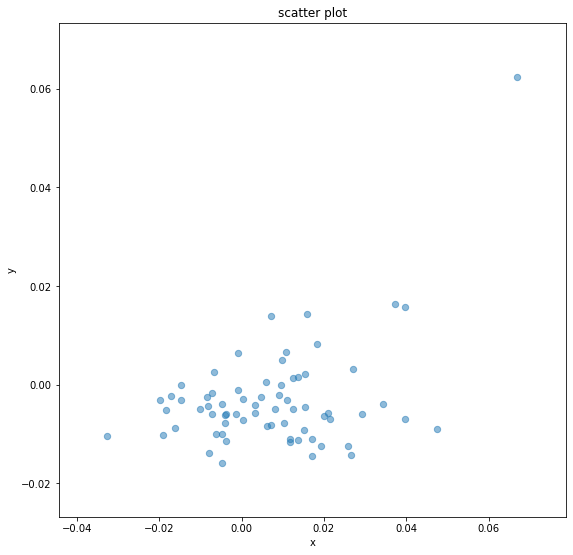

In [78]:
x,y=df_decom_list[0][df_decom_list[0].columns[0]],df_decom_list[0][df_decom_list[0].columns[1]]

label=df_decom[df_decom_list[0].columns[2]]

fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221)
#ax2=fig.add_subplot(222)

ax1.set_title('scatter plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax1.scatter(x,y, s=40,marker='o',cmap='viridis',alpha=0.5)
#ax2.scatter(pca_X[:,0],pca_X[:,1])
plt.show()

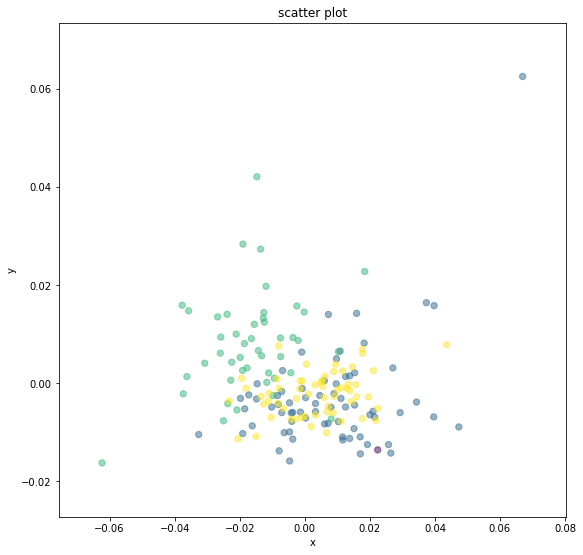

In [79]:
x,y=df_decom[df_decom.columns[0]],df_decom[df_decom.columns[1]]

label=df_decom[df_decom.columns[2]]

fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221)
#ax2=fig.add_subplot(222)

ax1.set_title('scatter plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax1.scatter(x,y, c=label,s=40,marker='o',cmap='viridis',alpha=0.5)
#ax2.scatter(pca_X[:,0],pca_X[:,1])
plt.show()

# マハラノビス距離

In [80]:
import numpy as np
import matplotlib.pyplot as plt

divide = 2 #状態量の数
R = np.zeros((divide,divide))    #相関行列
invR = np.zeros((divide,divide)) #相関行列の逆行列
avg = np.zeros(divide)           #平均値
std = np.zeros(divide)           #標準偏差
make = 0

p = 0.95        #マハラノビス距離p=0.95で2σ
md_sikii = 2.448#MDの閾値95%で2.448
div = 50        #Mt楕円の分割数

def maha(x):
    global make, R, invR, avg, std

    N, _ = x.shape #Nはデータ数
    xx = np.copy(x)
    xx = np.array(xx,dtype="float32")
    x_return = []

    #各状態量から平均値を引く
    for i in range(divide):
        if make == 0:
            avg[i] = np.mean(x[:,i])
        for j in range(N):
            xx[j,i] = xx[j,i] - avg[i]

    #各状態量を標準偏差で割る
    for i in range(divide):
        if make == 0:
            std[i] = np.std(x[:,i])
        for j in range(N):
            xx[j,i] = xx[j,i] / std[i]

    #make=0のときだけ計算
    if make == 0:
        R = np.corrcoef(xx.transpose())
        invR = np.linalg.inv(R)
        make = 1

    #MD^2の計算
    for i in range(N):
        d0 = xx[i,:]
        d1 = np.dot(d0,invR)
        d2 = np.dot(d1,d0)/divide
        x_return.append(d2)

    return x_return

In [81]:
 df_decom_test, df_decom_list[0], df_decom_list[1], df_decom_list[2], df_decom

(            0         1  label
 173  0.022422 -0.013571     -1,
            0         1  label
 0   0.010867  0.006551      0
 1   0.013783  0.001502      0
 2   0.034343 -0.003827      0
 3   0.000277 -0.007086      0
 4   0.000245 -0.002937      0
 ..       ...       ...    ...
 64  0.039651 -0.006857      0
 65  0.017082 -0.014379      0
 66  0.004627 -0.002494      0
 67  0.015143 -0.009243      0
 68  0.037388  0.016407      0
 
 [69 rows x 3 columns],
             0         1  label
 69  -0.013564  0.027316      1
 70  -0.021074  0.010010      1
 71  -0.036231  0.001360      1
 72  -0.002012  0.008715      1
 73  -0.014728  0.042058      1
 74  -0.018568  0.008081      1
 75  -0.000182  0.014498      1
 76  -0.025809  0.009400      1
 77  -0.014272  0.006656      1
 78  -0.025960  0.006128      1
 79  -0.013270  0.005599      1
 80  -0.037691  0.015891      1
 81  -0.004284  0.002130      1
 82  -0.026791  0.013511      1
 83  -0.023673 -0.004162      1
 84  -0.019011  0.028334 

In [82]:
#単位空間の作成
avg_xlist = []
std_xlist = []

avg_ylist = []
std_ylist = []

array_list = []
md_list = []

for idx_, num in enumerate(sample_list):
    print(idx_, num)
    df_decom_num_copy = df_decom_list[idx_].copy()
    df_decom_num_copy = df_decom_num_copy.drop('label', axis =1)
    array_num = df_decom_num_copy.to_numpy()
    array_list.append(array_num)
    
    _ = maha(array_num)
    #_ = maha(data_num_list[idx_])
    avg_1_x = avg[0]
    avg_1_y = avg[1]
    print(avg_1_x ,avg_1_y)
    avg_xlist.append(avg_1_x)
    avg_ylist.append(avg_1_y)
    
    std_1_x = std[0]
    std_1_y = std[1]
    print(std_1_x ,std_1_y)
    std_xlist.append(std_1_x)
    std_ylist.append(std_1_y)

    #テストデータのマハラノビス距離
    df_decom_test_copy = df_decom_test.copy()
    df_decom_test_copy = df_decom_test_copy.drop('label', axis =1)
    array_test = df_decom_test_copy.to_numpy()
    print(array_test)

    #テストデータのマハラノビス距離
    md_1 = maha(array_test)
    print('md:',idx_,md_1)
    md_list.append(md_1)
    
    #initialisation of parameters
    divide = 2 #状態量の数
    R = np.zeros((divide,divide))    #相関行列
    invR = np.zeros((divide,divide)) #相関行列の逆行列
    avg = np.zeros(divide)           #平均値
    std = np.zeros(divide)           #標準偏差
    make = 0



0 2
0.00733093108298549 -0.0030782509689475375
0.0173985430515003 0.010595693605344257
[[ 0.02242163 -0.01357138]]
md: 0 [1.5129320744654482]
1 6
-0.016497780328364367 0.007914156645543333
0.013739595276329307 0.010207193348371238
[[ 0.02242163 -0.01357138]]
md: 1 [8.486709876983635]
2 10
0.0036295633683601043 -0.0022062092919965
0.012630204143835257 0.004422898731315409
[[ 0.02242163 -0.01357138]]
md: 2 [6.217658855585603]


In [83]:
avg_xlist, avg_ylist

([0.00733093108298549, -0.016497780328364367, 0.0036295633683601043],
 [-0.0030782509689475375, 0.007914156645543333, -0.0022062092919965])

In [84]:
std_xlist, std_ylist

([0.0173985430515003, 0.013739595276329307, 0.012630204143835257],
 [0.010595693605344257, 0.010207193348371238, 0.004422898731315409])

In [85]:
md_list

[[1.5129320744654482], [8.486709876983635], [6.217658855585603]]

In [86]:
array_list

[array([[ 0.01086743,  0.00655149],
        [ 0.01378292,  0.00150152],
        [ 0.03434261, -0.00382709],
        [ 0.00027673, -0.00708616],
        [ 0.00024544, -0.00293725],
        [ 0.00967639, -0.00011678],
        [-0.00631436, -0.01006617],
        [-0.00399539, -0.00776526],
        [ 0.00331309, -0.00413434],
        [ 0.01530276, -0.00444638],
        [ 0.06697925,  0.0624787 ],
        [ 0.03976303,  0.01579847],
        [-0.00370967, -0.00594277],
        [-0.00368205, -0.01138715],
        [ 0.01825655,  0.00817843],
        [ 0.01033374, -0.00781291],
        [ 0.00608124, -0.00829571],
        [ 0.00807877, -0.00489269],
        [ 0.02574384, -0.01250355],
        [ 0.02003231, -0.00640635],
        [-0.00415153, -0.00603556],
        [-0.00682343,  0.00257931],
        [ 0.00976633,  0.00499335],
        [ 0.02708288,  0.00311913],
        [-0.00708145, -0.0059742 ],
        [ 0.01163832, -0.01094306],
        [ 0.0137996 , -0.01124135],
        [ 0.01702735, -0.010

# 正規分布の等高線（0.95）をかく_2

In [87]:
array_list

[array([[ 0.01086743,  0.00655149],
        [ 0.01378292,  0.00150152],
        [ 0.03434261, -0.00382709],
        [ 0.00027673, -0.00708616],
        [ 0.00024544, -0.00293725],
        [ 0.00967639, -0.00011678],
        [-0.00631436, -0.01006617],
        [-0.00399539, -0.00776526],
        [ 0.00331309, -0.00413434],
        [ 0.01530276, -0.00444638],
        [ 0.06697925,  0.0624787 ],
        [ 0.03976303,  0.01579847],
        [-0.00370967, -0.00594277],
        [-0.00368205, -0.01138715],
        [ 0.01825655,  0.00817843],
        [ 0.01033374, -0.00781291],
        [ 0.00608124, -0.00829571],
        [ 0.00807877, -0.00489269],
        [ 0.02574384, -0.01250355],
        [ 0.02003231, -0.00640635],
        [-0.00415153, -0.00603556],
        [-0.00682343,  0.00257931],
        [ 0.00976633,  0.00499335],
        [ 0.02708288,  0.00311913],
        [-0.00708145, -0.0059742 ],
        [ 0.01163832, -0.01094306],
        [ 0.0137996 , -0.01124135],
        [ 0.01702735, -0.010

In [88]:
low_num_list = []
curve_c_num_list = []
for idx_, num in enumerate(sample_list):
    print(idx_, num)
    print(array_list[idx_][:,0] ,'\n', array_list[idx_][:,1])

    #楕円のデータ
    low_num = np.corrcoef(array_list[idx_][:,0], array_list[idx_][:,1])[0,1]
    low_num_list.append(low_num)
    
    #楕円半径の計算　Poe 
    #p=0.95に対応する楕円

    curve_c_num = np.zeros((2,div+1))
    for i in range(div+1):
        r = (-2*(1-low_num_list[idx_]**2)*np.log(1-p)/(1-2*low_num_list[idx_]*np.sin(i*2*np.pi/div)*np.cos(i*2*np.pi/div)))**0.5
        curve_c_num[0,i] = avg_xlist[idx_] + std_xlist[idx_] *r*np.cos(i*2*np.pi/div)
        curve_c_num[1,i] = avg_ylist[idx_] + std_ylist[idx_] *r*np.sin(i*2*np.pi/div)

        #print(r)
    curve_c_num_list.append(curve_c_num)

0 2
[ 0.01086743  0.01378292  0.03434261  0.00027673  0.00024544  0.00967639
 -0.00631436 -0.00399539  0.00331309  0.01530276  0.06697925  0.03976303
 -0.00370967 -0.00368205  0.01825655  0.01033374  0.00608124  0.00807877
  0.02574384  0.02003231 -0.00415153 -0.00682343  0.00976633  0.02708288
 -0.00708145  0.01163832  0.0137996   0.01702735  0.02146102  0.01252929
  0.01592315  0.01169568  0.04736556  0.0264682   0.00897512  0.00601414
 -0.01845393  0.01114116 -0.00468865  0.00332225  0.02101121  0.00725768
 -0.00076125 -0.01016346  0.01532557 -0.03260564  0.01252884 -0.01464155
 -0.01907945  0.02931535 -0.01483232 -0.00134231 -0.01974994 -0.00093559
  0.00713588 -0.00837537 -0.00814829 -0.0046509  -0.00788391 -0.00707457
 -0.00467533 -0.01614397 -0.01721041  0.01925689  0.03965103  0.01708246
  0.00462657  0.01514319  0.03738816] 
 [ 0.00655149  0.00150152 -0.00382709 -0.00708616 -0.00293725 -0.00011678
 -0.01006617 -0.00776526 -0.00413434 -0.00444638  0.0624787   0.01579847
 -0.005

In [89]:
df_decom_test, df_decom_list[0], df_decom_list[1], df_decom_list[2], df_decom

avg_xlist, avg_ylist

std_xlist, std_ylist

md_list

array_test

array_list

curve_c_num_list

low_num_list

[0.4287580287069833, 0.2729147152237661, 0.3134522429295313]

In [90]:
array_list[0][0], array_test[0][0]

(array([0.01086743, 0.00655149]), 0.0224216313171512)

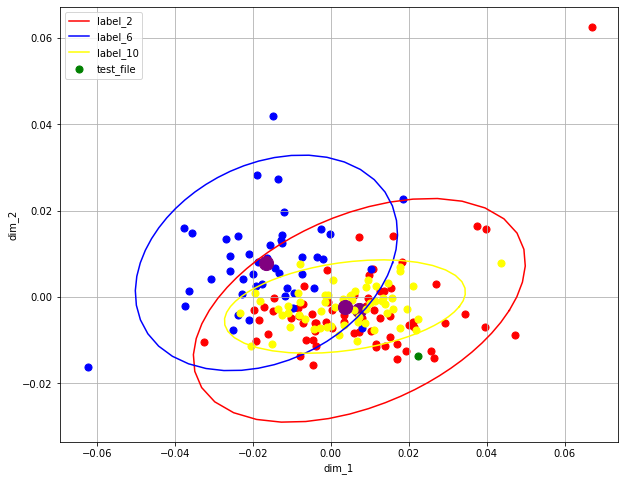

In [91]:
my_makedirs(new_dir_path_png_decom_dim2)
plt.figure(figsize = (10,8))
plt.scatter(array_test[0][0],array_test[0][1],c="green", s=50, label = 'test_file')

for idx_, num in enumerate(sample_list):
    

    x1 = array_list[idx_][:,0]
    y1 = array_list[idx_][:,1]
    #plt.subplot(1,2,1)
    plt.scatter(x1, y1, c=color_list[idx_], s=50)
    plt.plot(curve_c_num_list[idx_][0],curve_c_num_list[idx_][1],c=color_list[idx_],label="label_" + str(num))
    plt.scatter([avg_xlist[idx_]], [avg_ylist[idx_]], c="purple", s=200)
    plt.xlabel("dim_1")
    plt.ylabel("dim_2")

    plt.grid(True)
    plt.legend(loc='upper left')
    
    title_ =  ("decomposition" + str('poe')+ str('twain')+str('letter') +str('_')
               + str('test')+ str('_')+str('02') )
   
    
    filename = new_dir_path_png_decom_dim2 + "/" + title_ +".png"
    plt.savefig(filename)

In [92]:
md_list

[[1.5129320744654482], [8.486709876983635], [6.217658855585603]]

No handles with labels found to put in legend.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


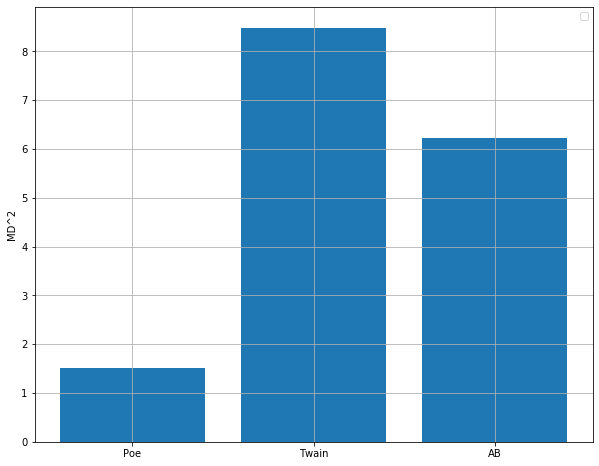

In [93]:
#可視化
plt.figure(figsize = (10,8))
plt.legend()

plt.subplot()
plt.bar([1,2,3], [md_list[0][0], md_list[1][0], md_list[2][0]], align="center")

plt.xticks([1,2, 3], ["Poe", "Twain",'AB'])
plt.ylabel("MD^2")
plt.grid(True)

my_makedirs(new_dir_path_png_Mahalanobis)

filename = new_dir_path_png_Mahalanobis + "/" + title_ +"bar.png"
plt.savefig(filename)

# adapt the result into EM -algorithm

In [94]:
df_decom_test, df_decom_list[0], df_decom_list[1], df_decom_list[2], df_decom

avg_xlist, avg_ylist

std_xlist, std_ylist

md_list

array_test

array_list

curve_c_num_list

low_num_list

[0.4287580287069833, 0.2729147152237661, 0.3134522429295313]

In [95]:
#adapt the result into EM -algorithm
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [96]:

x,y=df_decom[df_decom.columns[0]],df_decom[df_decom.columns[1]]

label=df_decom[df_decom.columns[2]]


In [97]:
x.shape, y.shape, label.shape

((174,), (174,), (174,))

In [98]:
x, y, label

(0      0.010867
 1      0.013783
 2      0.034343
 3      0.000277
 4      0.000245
          ...   
 169    0.014370
 170   -0.002522
 171    0.011686
 172    0.004965
 173    0.022422
 Name: 0, Length: 174, dtype: float64,
 0      0.006551
 1      0.001502
 2     -0.003827
 3     -0.007086
 4     -0.002937
          ...   
 169   -0.003751
 170   -0.003122
 171    0.002475
 172    0.000139
 173   -0.013571
 Name: 1, Length: 174, dtype: float64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 169    2
 170    2
 171    2
 172    2
 173   -1
 Name: label, Length: 174, dtype: int64)

In [99]:
df_decom_ = df_decom.copy()
df_decom_xy = df_decom_[[0,1]]
decom_xy_array = df_decom_xy.to_numpy()
decom_xy_array

array([[ 1.08674342e-02,  6.55149457e-03],
       [ 1.37829156e-02,  1.50152217e-03],
       [ 3.43426083e-02, -3.82709449e-03],
       [ 2.76726376e-04, -7.08615831e-03],
       [ 2.45441403e-04, -2.93724796e-03],
       [ 9.67638721e-03, -1.16780266e-04],
       [-6.31436129e-03, -1.00661685e-02],
       [-3.99539171e-03, -7.76525888e-03],
       [ 3.31309075e-03, -4.13434057e-03],
       [ 1.53027581e-02, -4.44637936e-03],
       [ 6.69792450e-02,  6.24787013e-02],
       [ 3.97630258e-02,  1.57984669e-02],
       [-3.70967324e-03, -5.94276807e-03],
       [-3.68204898e-03, -1.13871462e-02],
       [ 1.82565459e-02,  8.17843077e-03],
       [ 1.03337432e-02, -7.81290868e-03],
       [ 6.08124215e-03, -8.29571476e-03],
       [ 8.07876677e-03, -4.89268760e-03],
       [ 2.57438365e-02, -1.25035481e-02],
       [ 2.00323148e-02, -6.40634814e-03],
       [-4.15153436e-03, -6.03555899e-03],
       [-6.82342775e-03,  2.57931324e-03],
       [ 9.76633008e-03,  4.99335170e-03],
       [ 2.

In [100]:
labels_array = df_decom_.label.to_numpy()
labels_array

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2, -1], dtype=int64)

In [101]:
n_classes = len(np.unique(labels_array))-1
n_classes

3

In [102]:
#array_1.shape[0], array_0.shape[0]
data_set = []
for i in range(len(array_list)):
    print(array_list[i].shape[0])
    data_set.append(array_list[i])

69
45
59


In [103]:
#data_set = [array_2, array_1, array_0]
len(data_set), data_set

(3,
 [array([[ 0.01086743,  0.00655149],
         [ 0.01378292,  0.00150152],
         [ 0.03434261, -0.00382709],
         [ 0.00027673, -0.00708616],
         [ 0.00024544, -0.00293725],
         [ 0.00967639, -0.00011678],
         [-0.00631436, -0.01006617],
         [-0.00399539, -0.00776526],
         [ 0.00331309, -0.00413434],
         [ 0.01530276, -0.00444638],
         [ 0.06697925,  0.0624787 ],
         [ 0.03976303,  0.01579847],
         [-0.00370967, -0.00594277],
         [-0.00368205, -0.01138715],
         [ 0.01825655,  0.00817843],
         [ 0.01033374, -0.00781291],
         [ 0.00608124, -0.00829571],
         [ 0.00807877, -0.00489269],
         [ 0.02574384, -0.01250355],
         [ 0.02003231, -0.00640635],
         [-0.00415153, -0.00603556],
         [-0.00682343,  0.00257931],
         [ 0.00976633,  0.00499335],
         [ 0.02708288,  0.00311913],
         [-0.00708145, -0.0059742 ],
         [ 0.01163832, -0.01094306],
         [ 0.0137996 , -0.01124135

In [104]:
X_train, X_test, y_train, y_test = train_test_split(decom_xy_array, labels_array, test_size=0.3, random_state=42)

In [105]:
X_train, X_test

(array([[-0.01356358,  0.02731609],
        [-0.01845393, -0.0052145 ],
        [ 0.01033278,  0.0064106 ],
        [ 0.00976633,  0.00499335],
        [-0.00137688,  0.00050146],
        [-0.00971811, -0.00249075],
        [ 0.03738816,  0.01640671],
        [ 0.01007302, -0.00127454],
        [ 0.03976303,  0.01579847],
        [-0.02498372, -0.0076553 ],
        [-0.02580888,  0.00940003],
        [-0.00631436, -0.01006617],
        [ 0.01702735, -0.01091874],
        [-0.0267908 ,  0.01351095],
        [ 0.00024544, -0.00293725],
        [ 0.04736556, -0.00889649],
        [-0.01191452,  0.01975821],
        [ 0.00592189, -0.00290541],
        [ 0.00110362, -0.002208  ],
        [ 0.06697925,  0.0624787 ],
        [-0.00252237, -0.00312172],
        [-0.0084803 ,  0.00087589],
        [ 0.01086743,  0.00655149],
        [-0.00795542,  0.00758939],
        [-0.00272534, -0.00728875],
        [ 0.03965103, -0.00685699],
        [ 0.01532557,  0.00213719],
        [-0.01256386,  0.014

In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((121, 2), (53, 2), (121,), (53,))

In [107]:
# Try GMMs using different types of covariances.
estimators = {cov_type_: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type_, max_iter=20000, random_state=50)
              for cov_type_ in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

In [108]:
x_mistory,y_mistory = df_decom_test.to_numpy()[0][0], df_decom_test.to_numpy()[0][1]
x_mistory,y_mistory

(0.0224216313171512, -0.013571383964275872)

In [109]:
print(__doc__)

colors = ['navy', 'turquoise','green']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
            
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        
        

Automatically created module for IPython interactive environment


In [110]:

for idx_, num in enumerate(sample_list):
    print(idx_, num)

0 2
1 6
2 10


[[ 0.00798539 -0.00203386]
 [-0.01739486  0.00743093]
 [ 0.00403598 -0.00211302]]
GaussianMixture(covariance_type='spherical', init_params='kmeans',
                max_iter=20000,
                means_init=array([[ 0.00798539, -0.00203386],
       [-0.01739486,  0.00743093],
       [ 0.00403598, -0.00211302]]),
                n_components=3, n_init=1, precisions_init=None, random_state=50,
                reg_covar=1e-06, tol=0.001, verbose=0, verbose_interval=10,
                warm_start=False, weights_init=None)
[[ 0.01086743  0.00655149]
 [ 0.01378292  0.00150152]
 [ 0.03434261 -0.00382709]
 [ 0.00027673 -0.00708616]
 [ 0.00024544 -0.00293725]
 [ 0.00967639 -0.00011678]
 [-0.00631436 -0.01006617]
 [-0.00399539 -0.00776526]
 [ 0.00331309 -0.00413434]
 [ 0.01530276 -0.00444638]
 [ 0.06697925  0.0624787 ]
 [ 0.03976303  0.01579847]
 [-0.00370967 -0.00594277]
 [-0.00368205 -0.01138715]
 [ 0.01825655  0.00817843]
 [ 0.01033374 -0.00781291]
 [ 0.00608124 -0.00829571]
 [ 0.00807877 -0

[[ 0.01086743  0.00655149]
 [ 0.01378292  0.00150152]
 [ 0.03434261 -0.00382709]
 [ 0.00027673 -0.00708616]
 [ 0.00024544 -0.00293725]
 [ 0.00967639 -0.00011678]
 [-0.00631436 -0.01006617]
 [-0.00399539 -0.00776526]
 [ 0.00331309 -0.00413434]
 [ 0.01530276 -0.00444638]
 [ 0.06697925  0.0624787 ]
 [ 0.03976303  0.01579847]
 [-0.00370967 -0.00594277]
 [-0.00368205 -0.01138715]
 [ 0.01825655  0.00817843]
 [ 0.01033374 -0.00781291]
 [ 0.00608124 -0.00829571]
 [ 0.00807877 -0.00489269]
 [ 0.02574384 -0.01250355]
 [ 0.02003231 -0.00640635]
 [-0.00415153 -0.00603556]
 [-0.00682343  0.00257931]
 [ 0.00976633  0.00499335]
 [ 0.02708288  0.00311913]
 [-0.00708145 -0.0059742 ]
 [ 0.01163832 -0.01094306]
 [ 0.0137996  -0.01124135]
 [ 0.01702735 -0.01091874]
 [ 0.02146102 -0.00689219]
 [ 0.01252929 -0.0048413 ]
 [ 0.01592315  0.01424606]
 [ 0.01169568 -0.0115558 ]
 [ 0.04736556 -0.00889649]
 [ 0.0264682  -0.01422317]
 [ 0.00897512 -0.00212988]
 [ 0.00601414  0.00053058]
 [-0.01845393 -0.0052145 ]
 

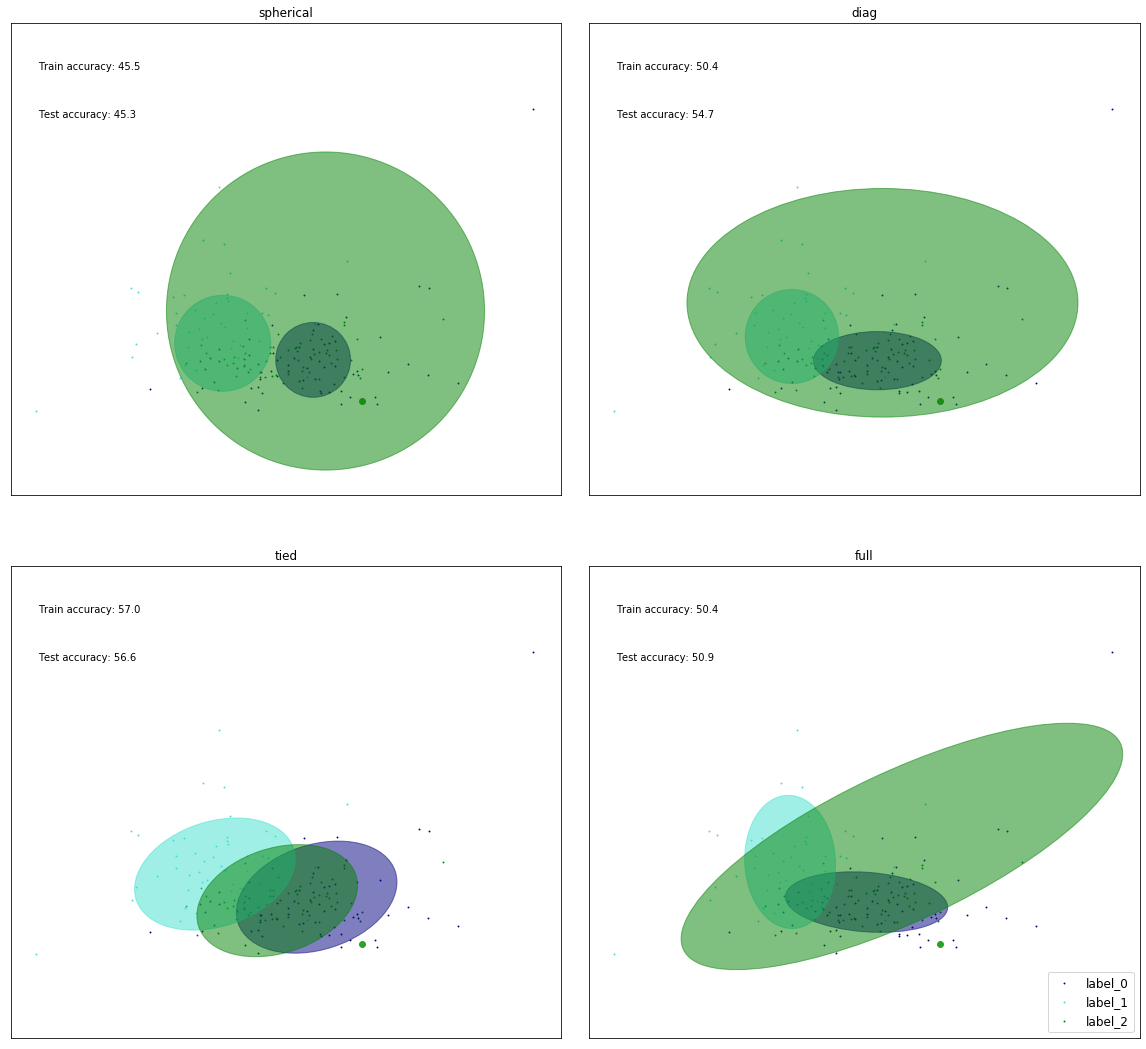

In [111]:
my_makedirs(new_dir_path_png_decom_dim2_EM)

plt.figure(figsize=(8 * n_estimators // 2, 15))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
for index, (name, estimator) in enumerate(estimators.items()):
    #print(index, name, estimator)
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])
    print(estimator.means_init)
    
    # Train the other parameters using the EM algorithm.
    #print(X_train, X_train.shape)
    estimator.fit(X_train)
    print(estimator.fit(X_train))
    
    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    
    #Plot train dataset
    for n, color in enumerate(colors):
        #data = iris.data[iris.target == n]
        data = data_set[n]
        print(data)
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,label='label_' +str(n))
        

    
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        data = data_set[n]
        #plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)
        
        plt.scatter(x_mistory,y_mistory, s=30.0, marker='o',cmap='red')
    

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))

filename = new_dir_path_png_decom_dim2_EM + "/" + title_ +".png"
plt.savefig(filename)
    
    
    
    

In [112]:
df_decom_test.to_numpy()[0][0]

0.0224216313171512

In [113]:
y_train_pred.ravel()

array([1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0], dtype=int64)

In [114]:
y_train.ravel()

array([ 1,  0,  1,  0,  2,  1,  0,  2,  0,  1,  1,  0,  0,  1,  0,  0,  1,
        2,  2,  0,  2,  2,  0,  2,  2,  0,  0,  1,  0,  0,  2,  0,  0,  2,
        1,  1,  1,  0,  1,  1,  2,  2,  2,  0,  1,  2,  2,  0,  1,  0,  2,
        2,  2,  0,  2,  1,  2,  1,  0,  0,  2,  0,  2,  0,  0,  1,  1,  0,
        0,  0,  0,  1,  2,  1,  1,  1,  2,  1,  0,  0,  0,  2,  2,  0,  1,
        2,  2,  2,  2,  0,  0,  1,  0,  2,  0,  0,  1,  0,  0,  2,  2,  0,
        2,  0,  0,  2,  2,  2,  1,  1,  2,  1,  1,  2, -1,  0,  1,  1,  0,
        1,  1], dtype=int64)

In [115]:
cc

NameError: name 'cc' is not defined

# 次元圧縮しないバージョン

In [ ]:
#PCA


#X_train,x_test,Y_train,y_test=train_test_split(datanp,label , test_size = 0.3, random_state = 666)
#datanp=data.values
#datanp.shape
#datanp


pca=PCA()
pca.fit(X_train)

pca_X=pca.transform(X_train)

#print("datanp:"+ str(datanp.shape))
print("X_train:"+ str(X_train.shape))
print("Y_train:"+ str(Y_train.shape))

print("pca.singular_values_:"+ str(pca.singular_values_))
print("pca.explained_variance_ratio_:"+ str(pca.explained_variance_ratio_))
print("pca_MEAN:"+ str(pca.mean_))
print("pca_X:"+ str(pca_X))

ev_ratio = pca.explained_variance_ratio_
ev_ratio
ev_ratio = np.hstack([0,ev_ratio])
plt.title("ev_ratio")
plt.plot(ev_ratio)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio_sum = np.hstack([0,ev_ratio.cumsum()])
plt.title("ev_ratio_sum")
plt.plot(ev_ratio_sum)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio_sum')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio

In [ ]:
data_features= data_.columns
data_features

In [ ]:
index=[0]
ev_ratio_array= np.delete(ev_ratio,index)

variance_ratio = pd.DataFrame(ev_ratio_array,index=data_features, columns=["variance_ratio"])

variance_ratio.plot.bar(figsize=(8, 5), color='yellow')
plt.title("ev_ratio")
groupin_variance_ratio=1.0-variance_ratio

groupin_variance_ratio.plot.bar(figsize=(8, 5), color='blue')
plt.title("1.0-ev_ratio")
plt.savefig('figure.png')

In [ ]:
variance_ratio

In [ ]:
groupin_variance_ratio

In [ ]:
groupin_variance_ratio.sort_values('variance_ratio', ascending=False)

In [ ]:
cc

# LogisticRegression

In [ ]:
pca=PCA(n_components=3)
lr = LogisticRegression()
X_trainnp= pca_X

lr.fit(X_train, Y_train)
X_train.shape,Y_train.shape
X_train

In [ ]:
prediction= lr.predict(x_test)
prediction
score = accuracy_score(prediction,y_test)
score

In [ ]:
X=datanp
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221,projection='3d')
#ax2=fig.add_subplot(222)

#color=['red','green','blue']
#ax1.scatter3D(X[:,0],X[:,1],X[:,2])
ax1.scatter3D(pca_X[:,0],pca_X[:,1],pca_X[:,2])
#ax2.scatter(pca_X[:,0],pca_X[:,1])

plt.show()

# VAL

In [ ]:
data_val

In [ ]:
data_val = data_val.drop(data_val.columns[0],axis=1)
#data_val = data_val.drop(data_val.columns[0],axis=1)
data_val

In [ ]:
data_val.columns[0], data_val.columns

In [ ]:
data_val = data_val.drop(data_val.columns[0],axis=1)
#data_val = data_val.drop(data_val.columns[0],axis=1)
data_val

In [ ]:
x_train

In [ ]:
pred=clf.predict(data_val)
pred

In [ ]:
features=X_train.columns
importances=clf.feature_importances_
indices=np.argsort(importances)
importances,indices

plt.figure(figsize=(5,5))
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [ ]:
importances=clf.feature_importances_
indices=np.argsort(importances)
importances,indices

In [ ]:
plt.figure(figsize=(5,5))
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [ ]:
import itertools
l = ['a', 'b', 'c', 'd']

c = itertools.combinations(l, 2)

print(type(c))
# <class 'itertools.combinations'>

for v in itertools.combinations(l, 2):
    print(v)
# ('a', 'b')
# ('a', 'c')
# ('a', 'd')
# ('b', 'c')
# ('b', 'd')
# ('c', 'd')

c_list = list(itertools.combinations(l, 2))

print(c_list)
# [('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

print(len(c_list))
# 6